In [1]:
#imstall missingno
!pip install missingno

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-darkgrid")
import missingno as msno 
import warnings
warnings.filterwarnings("ignore")

# Data Ingestion

In [2]:
df = pd.read_csv('C:/Users/CLINTON/Documents/My documents/LLM/Informatics/Neural Networks/vehicles.csv')
df.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,14.167143,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,27.046364,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,11.018889,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,27.046364,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,15.658421,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [3]:
emission = pd.read_csv('C:/Users/CLINTON/Documents/My documents/LLM/Informatics/Neural Networks/emissions.csv')
emission.head()

,efid,id,salesArea,score,scoreAlt,smartwayScore,standard,stdText
0,4HNXV03.2MJE,19332,3,1.0,-1.0,-1,B9,BIN 9
1,4HNXV03.2MJE,19332,7,1.0,-1.0,-1,L1,LEV
2,4HNXV03.2MJE,19333,3,1.0,-1.0,-1,B9,BIN 9
3,4HNXV03.2MJE,19333,7,1.0,-1.0,-1,L1,LEV
4,4ADXV01.8346,19334,3,1.0,-1.0,-1,B9,BIN 9


# Data Preparation

In [4]:
emission.shape

(47527, 8)

In [5]:
df.shape

(45992, 83)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45992 entries, 0 to 45991
Data columns (total 83 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   barrels08        45992 non-null  float64
 1   barrelsA08       45992 non-null  float64
 2   charge120        45992 non-null  float64
 3   charge240        45992 non-null  float64
 4   city08           45992 non-null  int64  
 5   city08U          45992 non-null  float64
 6   cityA08          45992 non-null  int64  
 7   cityA08U         45992 non-null  float64
 8   cityCD           45992 non-null  float64
 9   cityE            45992 non-null  float64
 10  cityUF           45992 non-null  float64
 11  co2              45992 non-null  int64  
 12  co2A             45992 non-null  int64  
 13  co2TailpipeAGpm  45992 non-null  float64
 14  co2TailpipeGpm   45992 non-null  float64
 15  comb08           45992 non-null  int64  
 16  comb08U          45992 non-null  float64
 17  combA08     

In [7]:
emission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47527 entries, 0 to 47526
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   efid           47527 non-null  object 
 1   id             47527 non-null  int64  
 2   salesArea      47527 non-null  int64  
 3   score          47527 non-null  float64
 4   scoreAlt       47527 non-null  float64
 5   smartwayScore  47527 non-null  int64  
 6   standard       47527 non-null  object 
 7   stdText        47513 non-null  object 
dtypes: float64(2), int64(3), object(3)
memory usage: 2.9+ MB


In [8]:
# merging emission with vehicle file using the column they have in common, id
data = df.merge(emission, on=['id'])
data.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,phevCity,phevHwy,phevComb,efid,salesArea,score,scoreAlt,smartwayScore,standard,stdText
0,16.528333,0.0,0.0,0.0,16,0.0,0,0.0,0.0,0.0,...,0,0,0,4HNXV03.2MJE,3,1.0,-1.0,-1,B9,BIN 9
1,16.528333,0.0,0.0,0.0,16,0.0,0,0.0,0.0,0.0,...,0,0,0,4HNXV03.2MJE,7,1.0,-1.0,-1,L1,LEV
2,16.528333,0.0,0.0,0.0,16,0.0,0,0.0,0.0,0.0,...,0,0,0,4HNXV03.2MJE,3,1.0,-1.0,-1,B9,BIN 9
3,16.528333,0.0,0.0,0.0,16,0.0,0,0.0,0.0,0.0,...,0,0,0,4HNXV03.2MJE,7,1.0,-1.0,-1,L1,LEV
4,14.167143,0.0,0.0,0.0,18,0.0,0,0.0,0.0,0.0,...,0,0,0,4ADXV01.8346,3,1.0,-1.0,-1,B9,BIN 9


In [9]:
data.shape

(47393, 90)

In [10]:
# checking for duplicates
data.duplicated().value_counts()

False    47393
dtype: int64

**Missing value treatment**

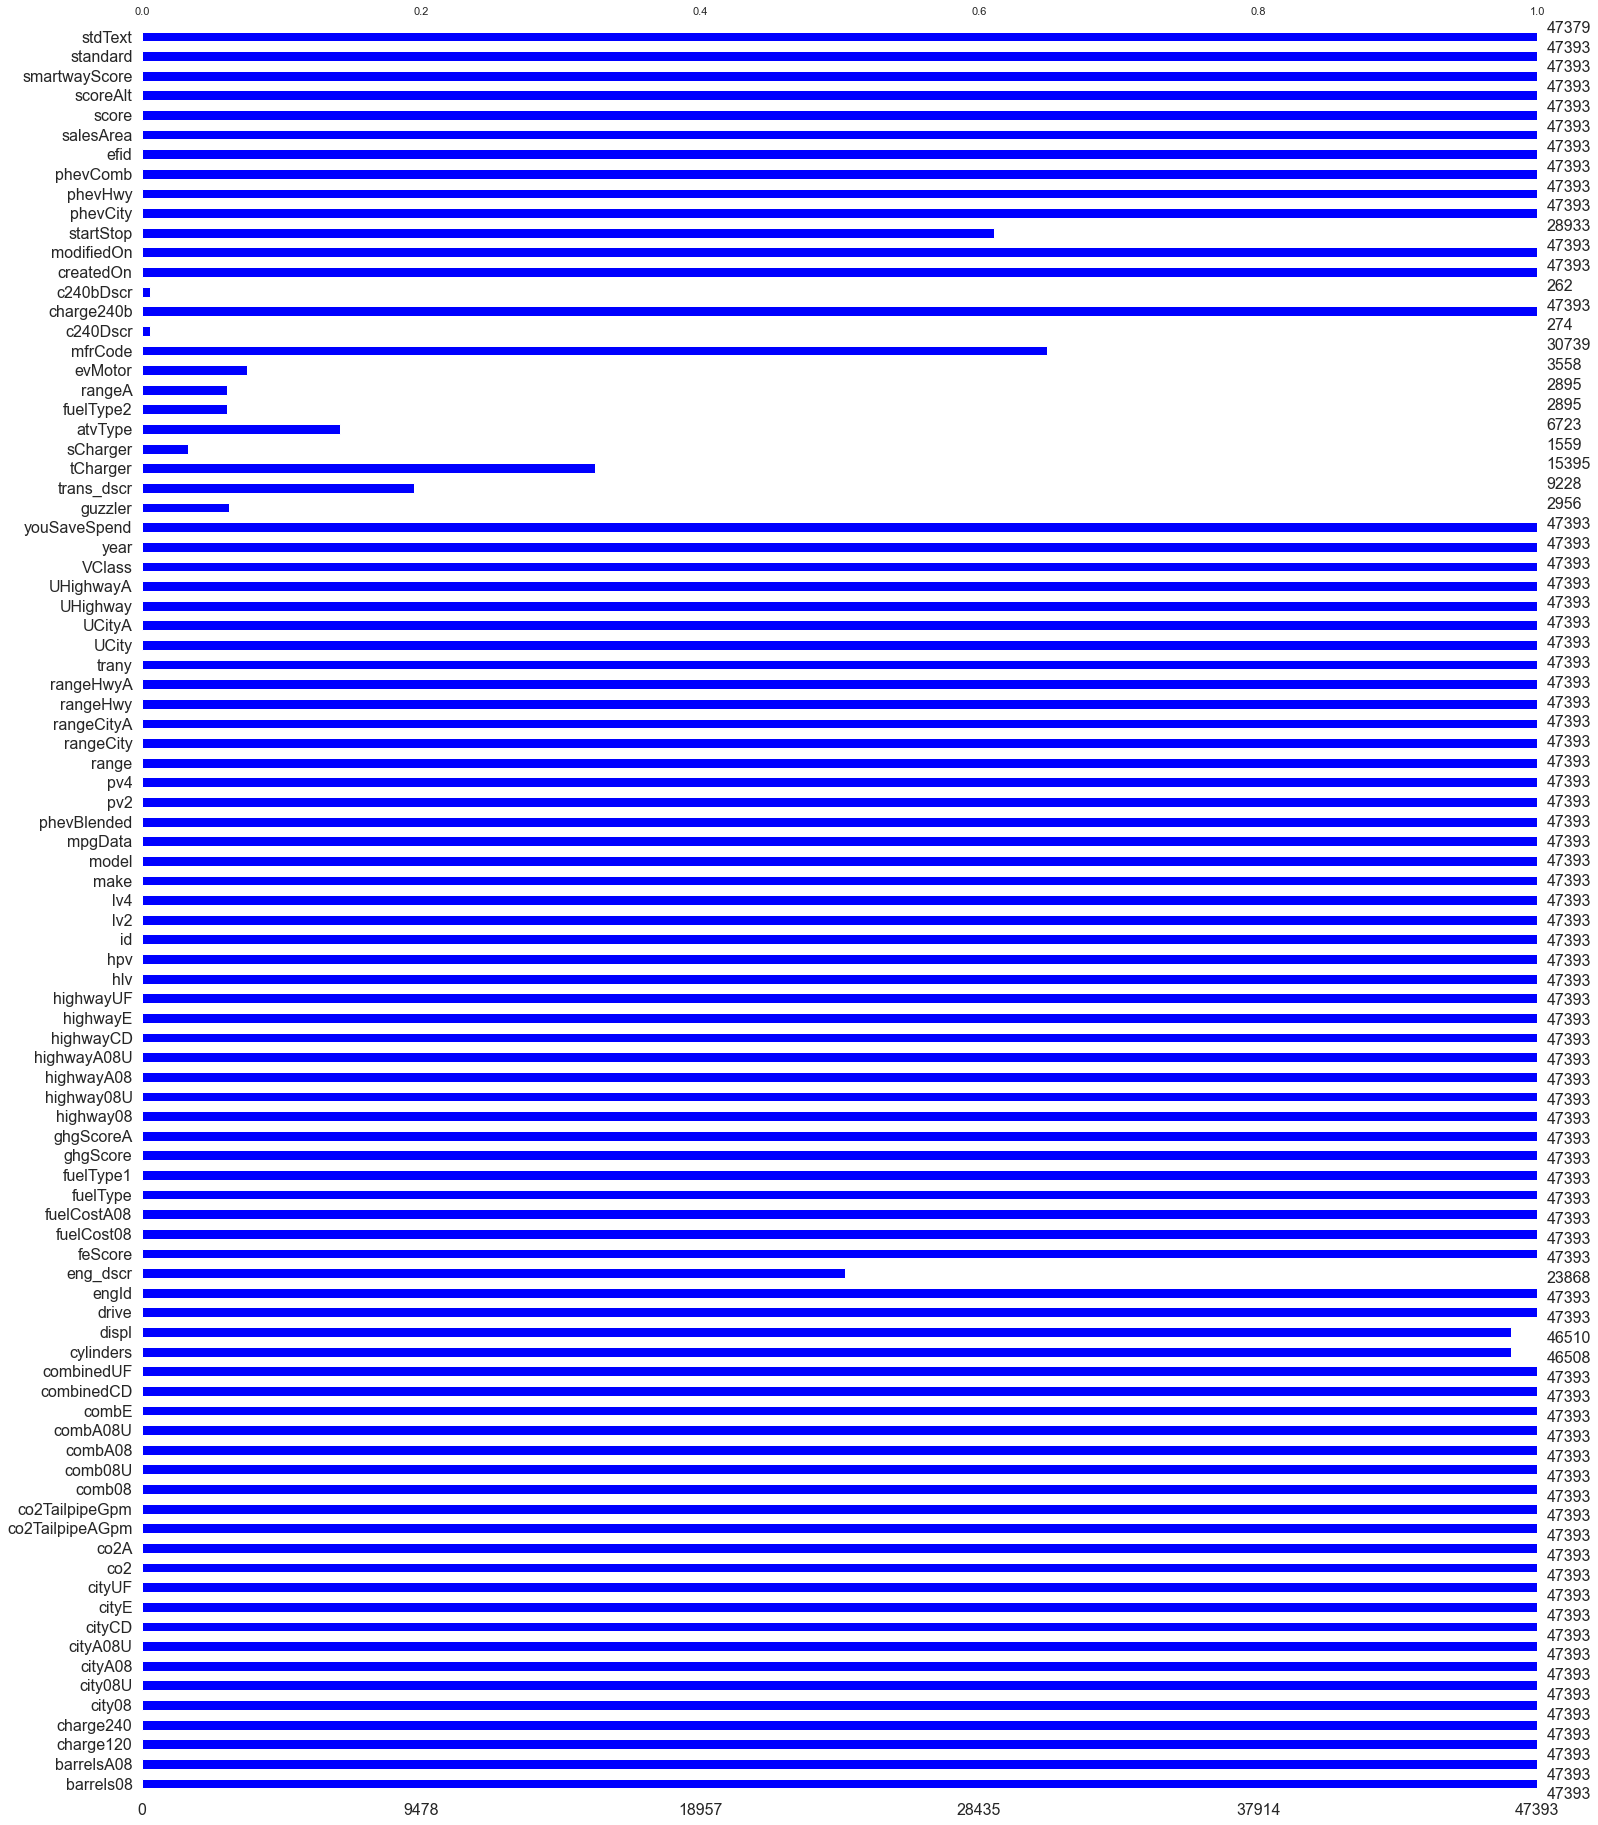

In [11]:
# Visualize the missing values using msno bar
sns.set(style = 'ticks')
msno.bar(data, color = "blue")
# This plot helps us to visualize the amount of missing data in every attributes for the train data set

In [12]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table

In [13]:
missing_zero_values_table(data)

Your selected dataframe has 90 columns and 47393 Rows.
There are 16 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
c240bDscr,0,47131,99.4,47131,99.4,object
c240Dscr,0,47119,99.4,47119,99.4,object
sCharger,0,45834,96.7,45834,96.7,object
fuelType2,0,44498,93.9,44498,93.9,object
rangeA,0,44498,93.9,44498,93.9,object
guzzler,0,44437,93.8,44437,93.8,object
evMotor,0,43835,92.5,43835,92.5,object
atvType,0,40670,85.8,40670,85.8,object
trans_dscr,0,38165,80.5,38165,80.5,object
tCharger,0,31998,67.5,31998,67.5,object


In [14]:
# Dropping columns with more than 20% missing values 
missing_data = data.isnull().sum()/len(data)
data = data.drop(columns=missing_data[missing_data>0.2].index)
data.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,phevCity,phevHwy,phevComb,efid,salesArea,score,scoreAlt,smartwayScore,standard,stdText
0,16.528333,0.0,0.0,0.0,16,0.0,0,0.0,0.0,0.0,...,0,0,0,4HNXV03.2MJE,3,1.0,-1.0,-1,B9,BIN 9
1,16.528333,0.0,0.0,0.0,16,0.0,0,0.0,0.0,0.0,...,0,0,0,4HNXV03.2MJE,7,1.0,-1.0,-1,L1,LEV
2,16.528333,0.0,0.0,0.0,16,0.0,0,0.0,0.0,0.0,...,0,0,0,4HNXV03.2MJE,3,1.0,-1.0,-1,B9,BIN 9
3,16.528333,0.0,0.0,0.0,16,0.0,0,0.0,0.0,0.0,...,0,0,0,4HNXV03.2MJE,7,1.0,-1.0,-1,L1,LEV
4,14.167143,0.0,0.0,0.0,18,0.0,0,0.0,0.0,0.0,...,0,0,0,4ADXV01.8346,3,1.0,-1.0,-1,B9,BIN 9


In [15]:
data.columns

Index(['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2',
       'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders',
       'displ', 'drive', 'engId', 'feScore', 'fuelCost08', 'fuelCostA08',
       'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA', 'highway08',
       'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD', 'highwayE',
       'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'make', 'model',
       'mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity',
       'rangeCityA', 'rangeHwy', 'rangeHwyA', 'trany', 'UCity', 'UCityA',
       'UHighway', 'UHighwayA', 'VClass', 'year', 'youSaveSpend', 'charge240b',
       'createdOn', 'modifiedOn', 'phevCity', 'phevHwy', 'phevComb', 'efid',
       'salesArea', 'score', 'scoreAlt', 'smartwayScore', 'standard',
       'stdText'],
      dtype='object')

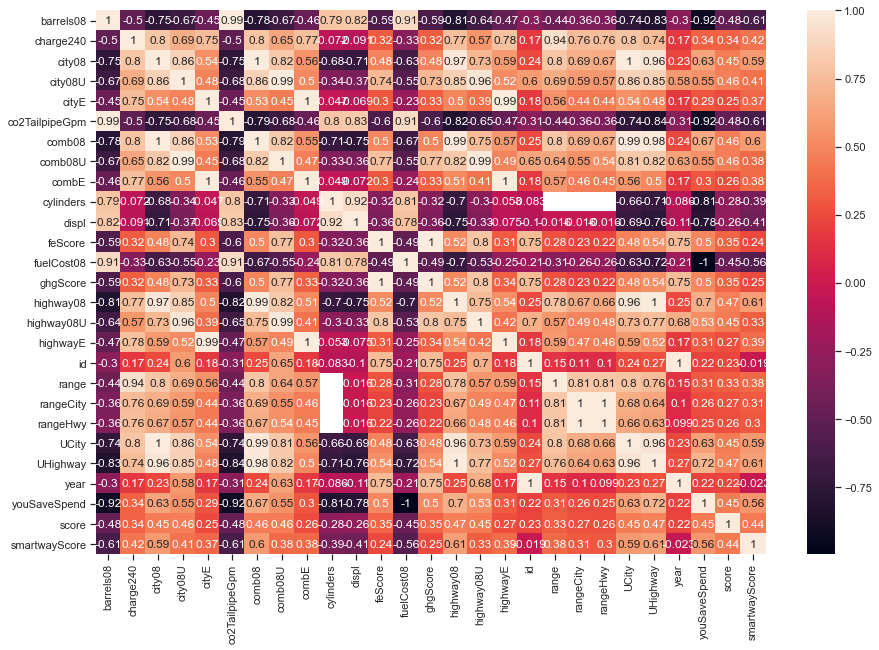

In [16]:
data.corr()
fig, ax = plt.subplots(figsize=(15,10)) 
Correlation_Matrix = data.corr()
Most_Correlated_Features = Correlation_Matrix.index[abs(Correlation_Matrix["co2TailpipeGpm"])>0.3]
sns.heatmap(data[Most_Correlated_Features].corr(),annot=True)

**Feature Selection**

**Target and Predictor variables explanation:** 

 
cylinders - engine cylinders

displ - engine displacement in liters

drive - drive axle type

engId - EPA model type index

feScore - EPA Fuel Economy Score

fuelCost08 - annual fuel cost

fuelType - fuel type with fuelType1 and fuelType2 (if applicable)

trany - transmission

VClass - EPA vehicle size class

make - manufacturer

model - model name

This project involves prediction of fuel economy and emission, and from the documentation of this data set (https://www.fueleconomy.gov/feg/ws/index.shtml#fuelType1), there are two fuel types for each prediction, fuel type1 and fuel type2, however fuel type2 was dropped because it has over 93% missing values. So I'll be working with features related with fuel type 1 and I woulde be using the fuel type input variale because it is a combination of both fuel type one and two.

There are two co2 as target features, co2 and co2TailpipeGpm, from the documentation, they have same meaning but they actually have different data inputs, so I would view them individually and use just one.

In [17]:
data['co2TailpipeGpm'].value_counts()

423.190476    2011
444.350000    1902
467.736842    1770
493.722222    1611
403.954545    1517
              ... 
391.538462       1
987.444444       1
130.000000       1
565.555556       1
682.000000       1
Name: co2TailpipeGpm, Length: 657, dtype: int64

In [18]:
data['co2'].value_counts()

-1      18849
 0        885
 407      187
 415      180
 387      178
        ...  
 782        2
 689        2
 682        1
 707        1
 130        1
Name: co2, Length: 602, dtype: int64

It can be seen that co2 has -1 data inputs. 

The amount of carbon dioxide that is emitted into the atmosphere by a vehicle's combustion of fossil fuels is measured by its CO2 emissions, which technically cannot be negative.

However, a vehicle could have "negative emissions" in the sense that it uses carbon capture and storage (CCS) technology to lower the quantity of CO2 in the atmosphere.

There aren't any vehicles on the market right now that use carbon capture and storage (CCS) technology to achieve negative emissions.

There for I will not be using this particular co2 feature in this project, I'd use the co2tailpipe as my target co2.

In [19]:
targets = data[['fuelCost08','co2TailpipeGpm']]
targets

,fuelCost08,co2TailpipeGpm
0,3500,493.722222
1,3500,493.722222
2,3500,493.722222
3,3500,493.722222
4,3000,423.190476
...,...,...
47388,1100,0.000000
47389,1000,0.000000
47390,1000,0.000000
47391,1050,0.000000


# FOCUSING ON TARGET CO2TailPipe

In [20]:
# Selecting relevant features of vehicles from the whole dataset that
#contributes to CO2 emission  
new_data = data[['cylinders', 'displ', 'drive', 'fuelType', 'make',
       'model','year', 'trany', 'VClass', 'co2TailpipeGpm']]

In [21]:
new_data.head()

,cylinders,displ,drive,fuelType,make,model,year,trany,VClass,co2TailpipeGpm
0,6.0,3.0,Rear-Wheel Drive,Premium,Acura,NSX,2004,Automatic (S4),Two Seaters,493.722222
1,6.0,3.0,Rear-Wheel Drive,Premium,Acura,NSX,2004,Automatic (S4),Two Seaters,493.722222
2,6.0,3.2,Rear-Wheel Drive,Premium,Acura,NSX,2004,Manual 6-spd,Two Seaters,493.722222
3,6.0,3.2,Rear-Wheel Drive,Premium,Acura,NSX,2004,Manual 6-spd,Two Seaters,493.722222
4,4.0,1.8,Front-Wheel Drive,Premium,Audi,TT Roadster,2004,Automatic (S6),Two Seaters,423.190476


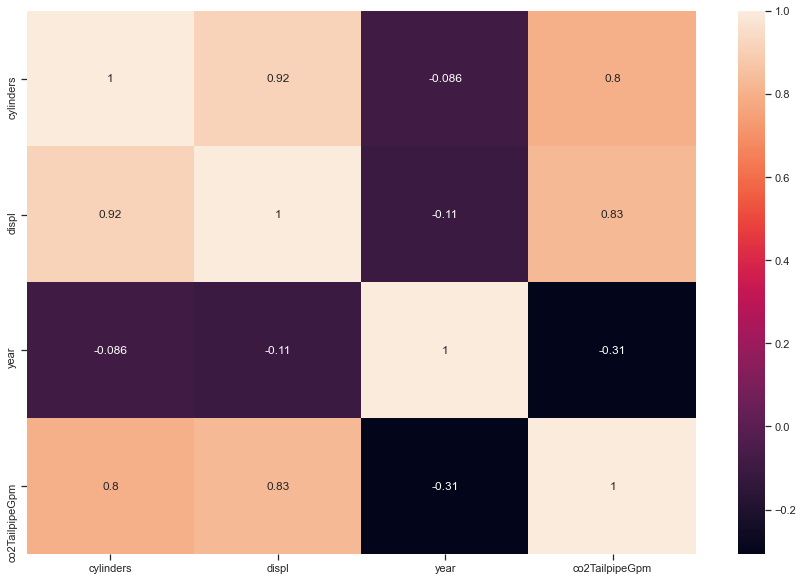

In [22]:
new_data.corr()
fig, ax = plt.subplots(figsize=(15,10)) 
Correlation_Matrix = new_data.corr()
Most_Correlated_Features = Correlation_Matrix.index[abs(Correlation_Matrix["co2TailpipeGpm"])>0.3]
sns.heatmap(new_data[Most_Correlated_Features].corr(),annot=True)

In [23]:
#checking for missing values after drop
new_data.isnull().sum()


cylinders         885
displ             883
drive               0
fuelType            0
make                0
model               0
year                0
trany               0
VClass              0
co2TailpipeGpm      0
dtype: int64

**Treating missing values after drop**

In [24]:
# replacing missing values in 'displ' column with the mean ( choosing the mean because its inputs are decimals and given 
#that the mean is likely to give a decimal number, it'll fit into the column data)

mean_displ = new_data['displ'].mean()
new_data['displ'].replace(np.nan, mean_displ, inplace = True)

In [25]:
# replacing missing values in 'cylinders' column with the median ( choosing the median because its inputs are intergers and 
#given that the mean is likely to give a decimal number, it wont fit into the column data)

med_cyl = new_data['cylinders'].median()
new_data['cylinders'].replace(np.nan, med_cyl, inplace = True)

In [26]:
#checking for missing values after drop
new_data.isnull().sum()


cylinders         0
displ             0
drive             0
fuelType          0
make              0
model             0
year              0
trany             0
VClass            0
co2TailpipeGpm    0
dtype: int64

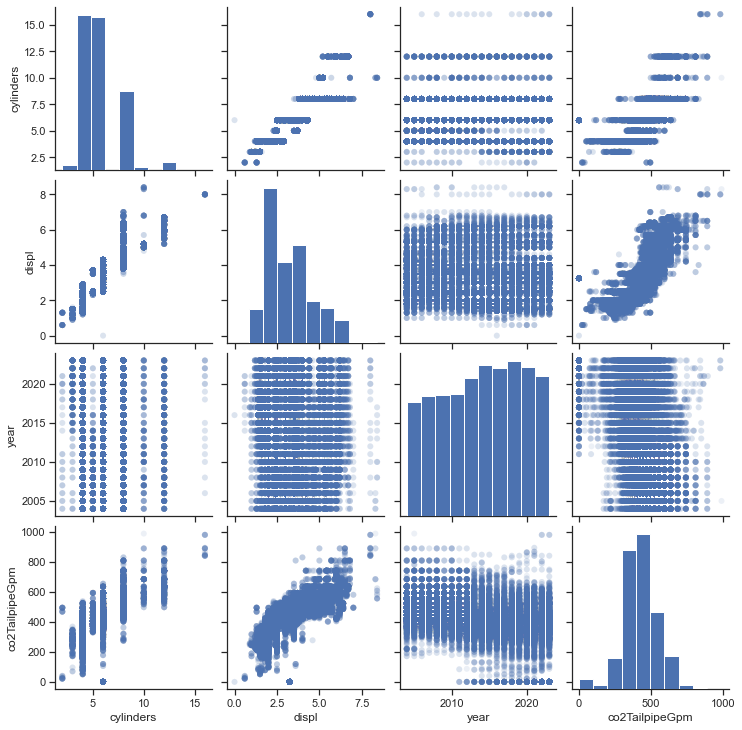

In [27]:
# Create a matrix scatterplot 
sns.pairplot(new_data, plot_kws = dict(alpha=.1, edgecolor = 'none')) 

# Exploratory Data Analysis

**Treating Outliers**

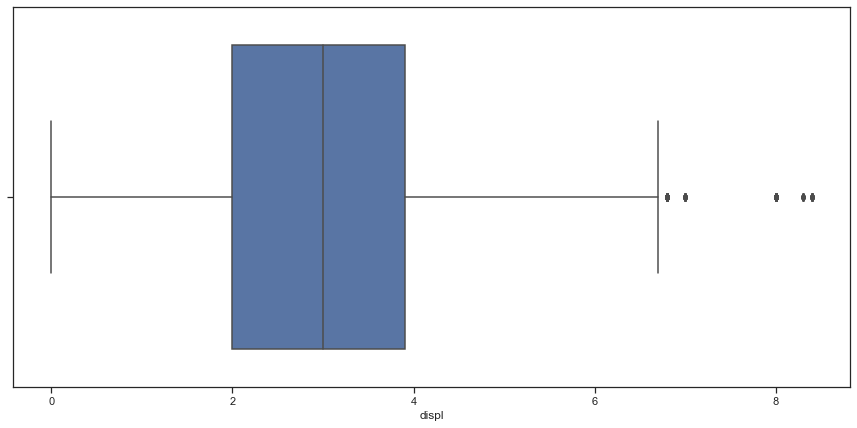

In [28]:
#creating boxplot to get more details on outliers
f, ax = plt.subplots(figsize=(15,7))
ax = sns.boxplot(x =new_data['displ'])

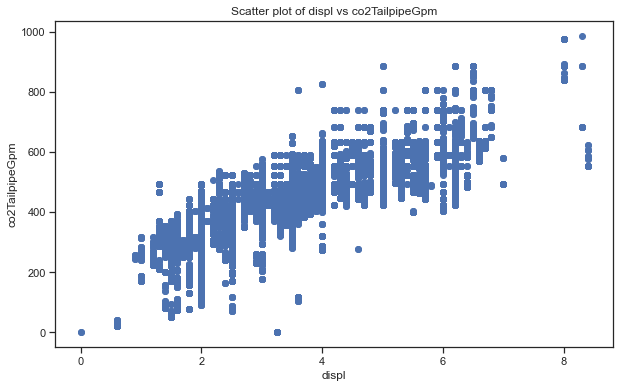

In [29]:
#using scatter plot (crossplot) to visualize better
plt.figure(figsize=(10, 6))
plt.scatter(x=new_data['displ'], y=new_data['co2TailpipeGpm'])
plt.title('Scatter plot of displ vs co2TailpipeGpm')
plt.xlabel('displ')
plt.ylabel('co2TailpipeGpm')
plt.show()


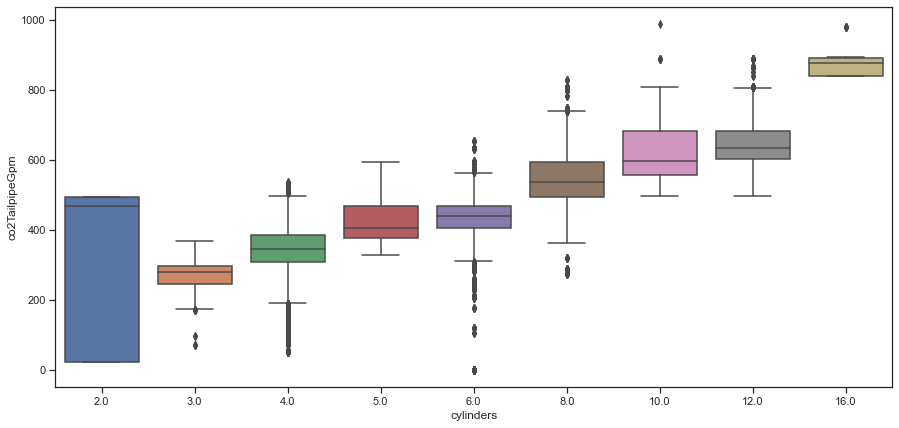

In [30]:
f, ax = plt.subplots(figsize=(15,7))
ax = sns.boxplot(x =new_data['cylinders'], y =new_data['co2TailpipeGpm'])

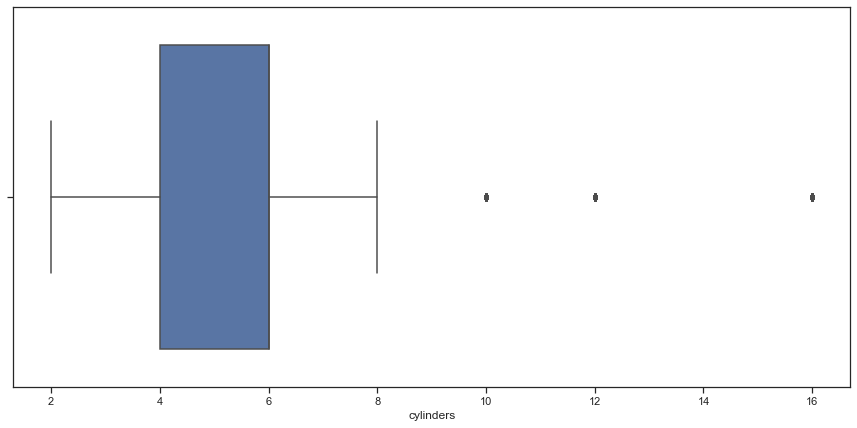

In [31]:
f, ax = plt.subplots(figsize=(15,7))
ax = sns.boxplot(x =new_data['cylinders'])

In [32]:
#Removal of outliers
new_data_clean = new_data [(new_data['cylinders']< 12.5) & 
                           (new_data['displ'] < 7.5)].copy()

In [33]:
new_data_clean.describe()

,cylinders,displ,year,co2TailpipeGpm
count,47325.000000,47325.000000,47325.000000,47325.000000
mean,5.716366,3.243353,2014.009213,419.109174
std,1.796169,1.292170,5.645521,120.965660
min,2.000000,0.000000,2004.000000,0.000000
25%,4.000000,2.000000,2009.000000,350.000000
50%,6.000000,3.000000,2014.000000,422.000000
75%,6.000000,3.900000,2019.000000,493.722222
max,12.000000,7.000000,2023.000000,888.700000


In [34]:
new_data_clean.isnull().sum()

cylinders         0
displ             0
drive             0
fuelType          0
make              0
model             0
year              0
trany             0
VClass            0
co2TailpipeGpm    0
dtype: int64

**Categorical and numerical variables**

In [35]:
numerical_features = new_data_clean._get_numeric_data().columns 
categorical_features = new_data_clean.columns.difference(numerical_features)

In [36]:
categorical_features

Index(['VClass', 'drive', 'fuelType', 'make', 'model', 'trany'], dtype='object')

In [37]:
new_data_clean.columns

Index(['cylinders', 'displ', 'drive', 'fuelType', 'make', 'model', 'year',
       'trany', 'VClass', 'co2TailpipeGpm'],
      dtype='object')

In [38]:
#just checking the classes of vehicles
new_data_clean['VClass'].value_counts()

Midsize Cars                          6744
Compact Cars                          6293
Subcompact Cars                       4459
Large Cars                            3590
Small Sport Utility Vehicle 4WD       3141
Two Seaters                           2753
Sport Utility Vehicle - 4WD           2748
Standard Sport Utility Vehicle 4WD    2436
Sport Utility Vehicle - 2WD           2110
Minicompact Cars                      1943
Small Sport Utility Vehicle 2WD       1848
Small Station Wagons                  1803
Standard Pickup Trucks 4WD            1779
Standard Pickup Trucks 2WD            1678
Standard Sport Utility Vehicle 2WD     862
Small Pickup Trucks 2WD                568
Midsize Station Wagons                 546
Minivan - 2WD                          487
Small Pickup Trucks 4WD                447
Special Purpose Vehicle 2WD            349
Vans, Cargo Type                       319
Vans, Passenger Type                   272
Special Purpose Vehicle 4WD             82
Minivan - 4

In [39]:
new_data_clean['fuelType'].value_counts()

Regular                        22633
Premium                        19853
Gasoline or E85                 2059
Electricity                      885
Diesel                           694
Midgrade                         329
Premium and Electricity          304
Premium or E85                   224
Regular Gas and Electricity      167
Premium Gas or Electricity       117
CNG                               36
Regular Gas or Electricity        16
Gasoline or natural gas            8
Name: fuelType, dtype: int64

In [40]:
desired_fuel = ["Regular", "Premium", "Gasoline or E85", "Diesel", "Midgrade", "Premium or E85", "CNG", "Gasoline or natural gas "]

In [41]:
subset_df = new_data_clean[new_data_clean["fuelType"].isin(desired_fuel)]

In [42]:
subset_df.head()

,cylinders,displ,drive,fuelType,make,model,year,trany,VClass,co2TailpipeGpm
0,6.0,3.0,Rear-Wheel Drive,Premium,Acura,NSX,2004,Automatic (S4),Two Seaters,493.722222
1,6.0,3.0,Rear-Wheel Drive,Premium,Acura,NSX,2004,Automatic (S4),Two Seaters,493.722222
2,6.0,3.2,Rear-Wheel Drive,Premium,Acura,NSX,2004,Manual 6-spd,Two Seaters,493.722222
3,6.0,3.2,Rear-Wheel Drive,Premium,Acura,NSX,2004,Manual 6-spd,Two Seaters,493.722222
4,4.0,1.8,Front-Wheel Drive,Premium,Audi,TT Roadster,2004,Automatic (S6),Two Seaters,423.190476


In [52]:
Emission_by_make = subset_df.groupby('make')['co2TailpipeGpm'].mean().reset_index().sort_values(by= 'co2TailpipeGpm', ascending = False)
Top_20 = Emission_by_make.head(21)
Top_20

,make,co2TailpipeGpm
34,Maybach,732.634317
26,Lamborghini,689.455324
58,"Tecstar, LP",683.615385
43,Pagani,683.000000
49,Roush Performance,644.983827
51,Saleen Performance,644.551648
6,Bentley,627.985657
13,Ferrari,624.685455
48,Rolls-Royce,624.124476
19,Hummer,595.315064


Text(0.5, 1.0, 'Top Emission Makes')

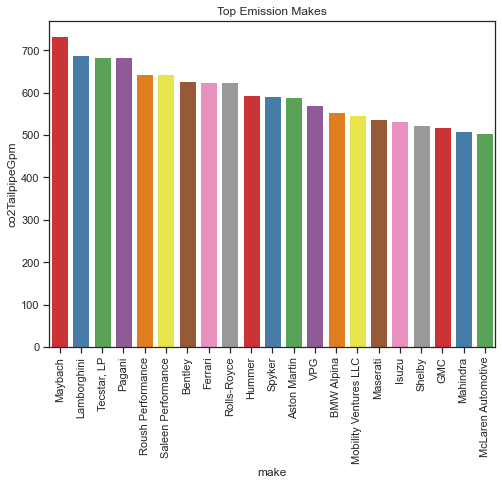

In [53]:
palette = "Set1"
plt.figure(figsize=(8,6))
sns.barplot(x = Top_20['make'], y = Top_20['co2TailpipeGpm'], palette=palette)

plt.xlabel('make')
plt.ylabel("co2TailpipeGpm")
plt.xticks(rotation=90)
plt.title("Top Emission Makes")

In [47]:
least_20 = Emission_by_make.tail(20)
least_20

,make,co2TailpipeGpm
62,Volvo,407.151093
7,Buick,405.382031
57,Suzuki,405.095214
28,Lexus,403.303245
44,Pontiac,398.508750
59,Toyota,395.608031
0,Acura,392.866428
39,Mitsubishi,392.043542
11,Daewoo,390.160575
56,Subaru,383.357194


Text(0.5, 1.0, 'least Emission Makes')

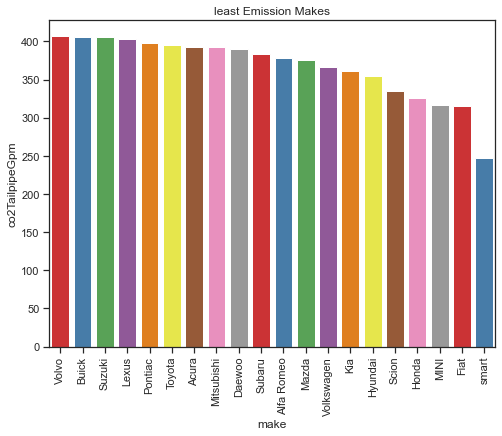

In [51]:
palette = "Set1"
plt.figure(figsize=(8,6))
sns.barplot(x = least_20['make'], y = least_20['co2TailpipeGpm'], palette=palette)

plt.xlabel('make')
plt.ylabel("co2TailpipeGpm")
plt.xticks(rotation=90)
plt.title("least Emission Makes")

In [55]:
Emission_by_veh = subset_df.groupby(['make','model','year'])['co2TailpipeGpm'].mean().reset_index().sort_values(by= 'co2TailpipeGpm', ascending = False)
most_em_veh = Emission_by_veh.head(20)
most_em_veh

Emission_by_veh["year"] = Emission_by_veh["year"].astype(str)
Emission_by_veh["vehicle"] = Emission_by_veh["make"] + " " + Emission_by_veh["model"] + " " + Emission_by_veh["year"]
Emission_by_veh.drop(["make", "model", "year"], axis =1, inplace =True)

Emission_by_veh = Emission_by_veh.reindex(columns=["vehicle","co2TailpipeGpm"])

In [60]:
most_em_veh = Emission_by_veh.head(51)
most_em_veh


,vehicle,co2TailpipeGpm
7284,Lamborghini Aventador Sian Roadster 2021,867.000000
7282,Lamborghini Aventador Sian Coupe 2021,867.000000
7283,Lamborghini Aventador Sian Roadster 2020,861.000000
7281,Lamborghini Aventador Sian Coupe 2020,861.000000
7265,Lamborghini Aventador Coupe 2021,852.000000
7346,Lamborghini Murcielago Roadster 2010,848.304545
7336,Lamborghini L-147/148 Murcielago 2005,848.304545
7337,Lamborghini L-147/148 Murcielago 2006,848.304545
7338,Lamborghini L-147/148 Murcielago 2007,848.304545
7339,Lamborghini Murcielago 2008,848.304545


Text(0.5, 1.0, 'Vehicle with most co2 Tailpipe Emission')

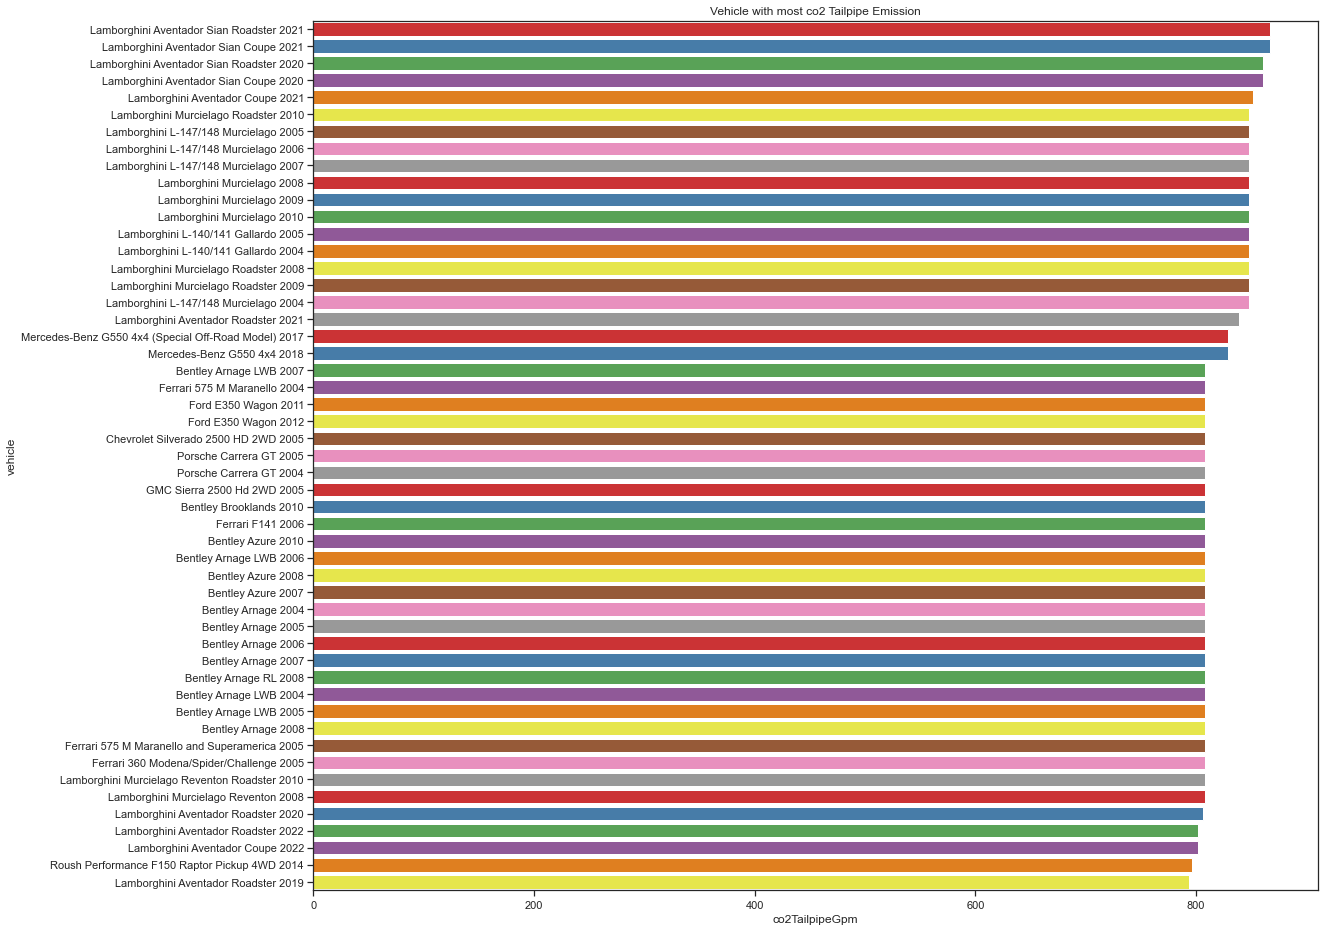

In [65]:
plt.figure(figsize=(18,16))
palette = "Set1"
sns.barplot(x = most_em_veh['co2TailpipeGpm'], y = most_em_veh['vehicle'],palette=palette, orient = 'h')

plt.xlabel('co2TailpipeGpm')
plt.ylabel("vehicle")
plt.title("Vehicle with most co2 Tailpipe Emission")

In [66]:
least_em_veh = Emission_by_veh.tail(50)
least_em_veh

,vehicle,co2TailpipeGpm
7006,Kia Niro FE 2017,177.0
12726,Toyota Prius AWD 2020,176.0
12725,Toyota Prius AWD 2019,176.0
5947,Hyundai Sonata Hybrid Blue 2023,172.0
5946,Hyundai Sonata Hybrid Blue 2022,172.0
5944,Hyundai Sonata Hybrid Blue 2020,172.0
5945,Hyundai Sonata Hybrid Blue 2021,172.0
12719,Toyota Prius 2017,171.0
12467,Toyota Camry Hybrid LE 2022,170.0
12466,Toyota Camry Hybrid LE 2021,170.0


Text(0.5, 1.0, 'Vehicle with least co2 Tailpipe Emission')

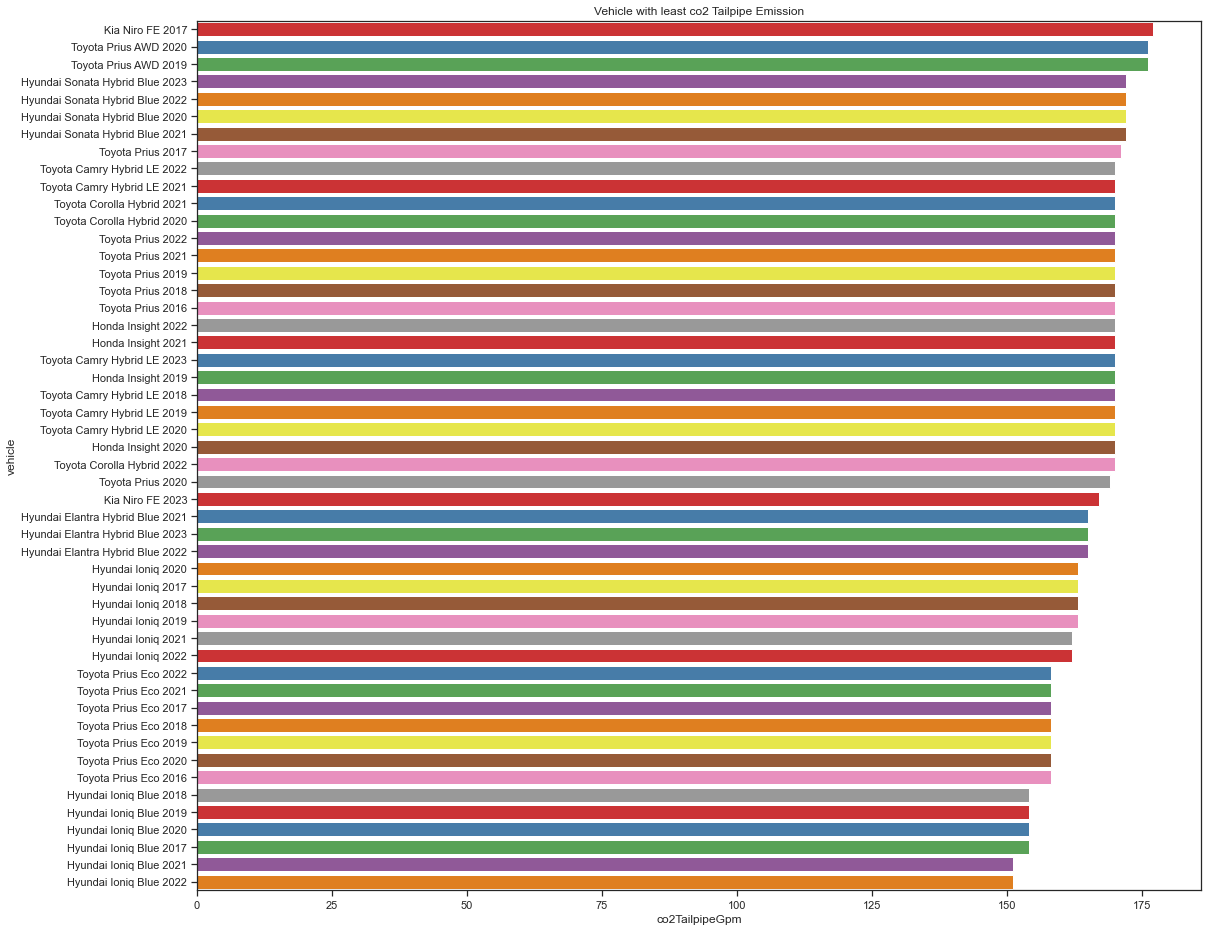

In [68]:
plt.figure(figsize=(18,16))
palette = "Set1"
sns.barplot(x = least_em_veh['co2TailpipeGpm'], y = least_em_veh['vehicle'],palette=palette, orient = 'h')

plt.xlabel('co2TailpipeGpm')
plt.ylabel("vehicle")
plt.title("Vehicle with least co2 Tailpipe Emission")

**Checking for relationships between the categorical variables and the target variable**

In [69]:
VClass_emission = subset_df.groupby('VClass')['co2TailpipeGpm'].mean().reset_index().sort_values(by= 'co2TailpipeGpm', ascending = False)
VClass_emission

,VClass,co2TailpipeGpm
23,"Vans, Passenger Type",647.879073
22,"Vans, Cargo Type",623.805116
13,Special Purpose Vehicle 4WD,558.475610
17,Standard Pickup Trucks 4WD,538.818805
15,Sport Utility Vehicle - 4WD,511.474240
16,Standard Pickup Trucks 2WD,509.687239
19,Standard Sport Utility Vehicle 4WD,500.206975
8,Small Pickup Trucks 4WD,489.231770
21,Two Seaters,479.384997
18,Standard Sport Utility Vehicle 2WD,478.880233


Text(0.5, 1.0, 'Emission by Vehicle Class')

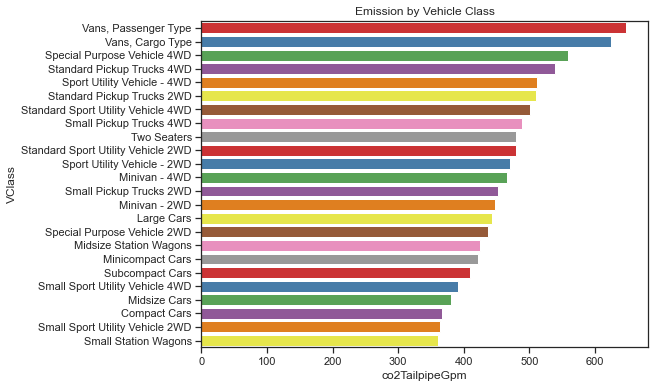

In [70]:
palette = "Set1"
plt.figure(figsize=(8,6))
sns.barplot(y = VClass_emission['VClass'], x = VClass_emission['co2TailpipeGpm'], orient = 'h', palette = palette)

plt.xlabel('co2TailpipeGpm')
plt.ylabel("VClass")
plt.title("Emission by Vehicle Class")

From the graph, we can see the classes of vehicles that emits the most CO2 and the classes that emits the least.

In [71]:
Wd_emission = subset_df.groupby('drive')['co2TailpipeGpm'].mean().reset_index().sort_values(by= 'co2TailpipeGpm', ascending = False)
Wd_emission

,drive,co2TailpipeGpm
1,4-Wheel or All-Wheel Drive,520.014199
4,Part-time 4-Wheel Drive,502.812835
5,Rear-Wheel Drive,480.814054
0,4-Wheel Drive,472.492041
2,All-Wheel Drive,422.322251
3,Front-Wheel Drive,350.211042


Text(0.5, 1.0, 'Emission by Drive Type')

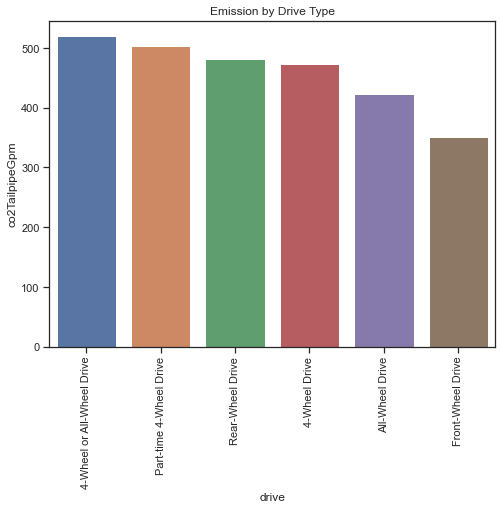

In [72]:
plt.figure(figsize=(8,6))
sns.barplot(x = Wd_emission['drive'], y = Wd_emission['co2TailpipeGpm'])

plt.xlabel('drive')
plt.ylabel("co2TailpipeGpm")
plt.xticks(rotation=90)
plt.title("Emission by Drive Type")

In [73]:
#Emission by Fuel_Type
Emission_by_Fuel = subset_df.groupby('fuelType')['co2TailpipeGpm'].mean().reset_index().sort_values(by= 'co2TailpipeGpm', ascending = False)
Emission_by_Fuel

,fuelType,co2TailpipeGpm
2,Gasoline or E85,509.294253
3,Midgrade,506.886556
5,Premium or E85,457.098420
4,Premium,448.428750
6,Regular,407.518945
1,Diesel,386.597164
0,CNG,377.678983


Text(0.5, 1.0, 'Emission by fuelType')

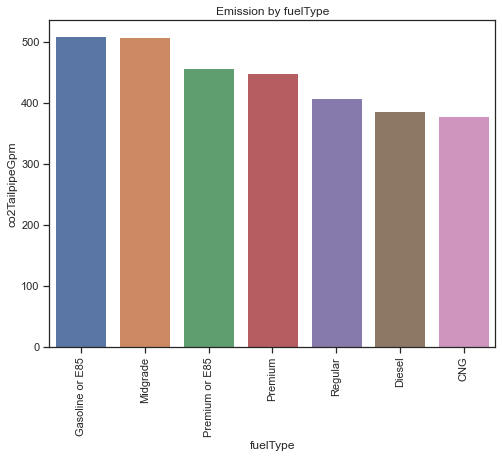

In [74]:
plt.figure(figsize=(8,6))
sns.barplot(x = Emission_by_Fuel['fuelType'], y = Emission_by_Fuel['co2TailpipeGpm'])

plt.xlabel('fuelType')
plt.ylabel("co2TailpipeGpm")
plt.xticks(rotation=90)
plt.title("Emission by fuelType")

It can be seen that the electric cars have 0 co2 emission, this is practically reasonable. And we can see that the alternative fuels in dual vehicles emits the least amounts of C02 than the conventional fuels in both single and dual vehicles.

In [88]:
Emission_by_make = new_data_clean.groupby('make')['co2TailpipeGpm'].mean().reset_index().sort_values(by= 'co2TailpipeGpm', ascending = False)
Top_10 = Emission_by_make.head(10)
Top_10

,make,co2TailpipeGpm
41,Maybach,732.634317
32,Lamborghini,689.455324
67,"Tecstar, LP",683.615385
50,Pagani,683.000000
58,Roush Performance,644.983827
60,Saleen Performance,644.551648
57,Rolls-Royce,624.124476
16,Ferrari,620.375873
8,Bentley,616.017858
23,Hummer,595.315064


In [89]:
Emission_by_make[Emission_by_make['co2TailpipeGpm']== 0]
#These are electric cars

,make,co2TailpipeGpm
56,Rivian,0.0
68,Tesla,0.0
29,Kandi,0.0
10,CODA Automotive,0.0
7,BYD,0.0
4,Azure Dynamics,0.0
37,Lucid,0.0


Text(0.5, 1.0, 'Top 10 car makes with the most Emission')

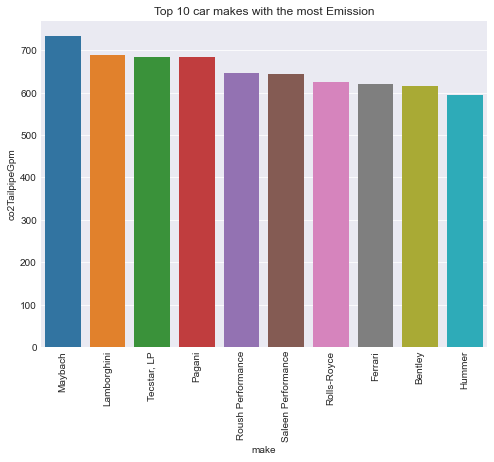

In [90]:
plt.figure(figsize=(8,6))
sns.barplot(x = Top_10['make'], y = Top_10['co2TailpipeGpm'])

plt.xlabel('make')
plt.ylabel("co2TailpipeGpm")
plt.xticks(rotation=90)
plt.title("Top 10 car makes with the most Emission")

In [91]:
least_emission = Emission_by_make.tail(10)
least_emission

,make,co2TailpipeGpm
73,smart,147.178679
30,Karma,96.750000
51,Polestar,20.666667
56,Rivian,0.000000
68,Tesla,0.000000
29,Kandi,0.000000
10,CODA Automotive,0.000000
7,BYD,0.000000
4,Azure Dynamics,0.000000
37,Lucid,0.000000


Text(0.5, 1.0, 'Top 10 car makes with the least Emission')

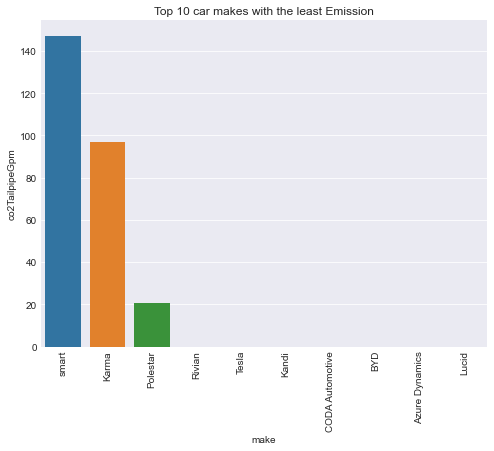

In [92]:
plt.figure(figsize=(8,6))
sns.barplot(x = least_emission['make'], y = least_emission['co2TailpipeGpm'])

plt.xlabel('make')
plt.ylabel("co2TailpipeGpm")
plt.xticks(rotation=90)
plt.title("Top 10 car makes with the least Emission")

In [93]:
Emission_by_model = new_data_clean.groupby('model')['co2TailpipeGpm'].mean().reset_index().sort_values(by= 'co2TailpipeGpm', ascending = False)
Top_10_models = Emission_by_model.head(10)
Top_10_models

,model,co2TailpipeGpm
571,Aventador Sian Coupe,864.000000
572,Aventador Sian Roadster,864.000000
1688,L-140/141 Gallardo,848.304545
1690,L-147/148 Murcielago,848.304545
2022,Murcielago Roadster,848.304545
2019,Murcielago,848.304545
1408,G550 4x4 (Special Off-Road Model),829.000000
1407,G550 4x4,829.000000
524,Arnage RL,807.909091
198,575 M Maranello,807.909091


Text(0.5, 1.0, 'Top 10 car models with the most Emission')

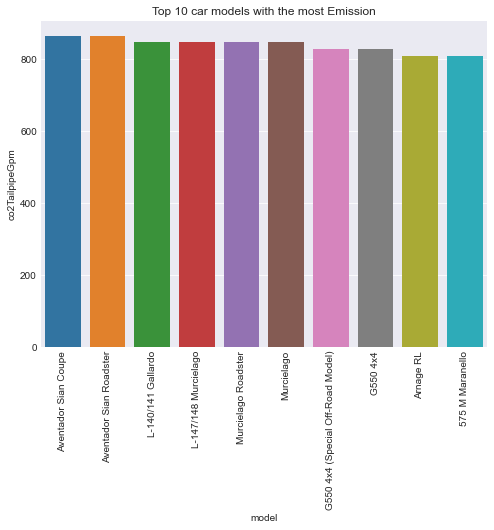

In [94]:
plt.figure(figsize=(8,6))
sns.barplot(x = Top_10_models['model'], y = Top_10_models['co2TailpipeGpm'])

plt.xlabel('model')
plt.ylabel("co2TailpipeGpm")
plt.xticks(rotation=90)
plt.title("Top 10 car models with the most Emission")

In [75]:
Emission_by_trany = subset_df.groupby('trany')['co2TailpipeGpm'].mean().reset_index().sort_values(by= 'co2TailpipeGpm', ascending = False)
Top_10_trany = Emission_by_trany.head(10)  
Top_10_trany

,trany,co2TailpipeGpm
22,Automatic 10-spd,508.191638
24,Automatic 5-spd,507.797259
23,Automatic 4-spd,488.558627
7,Automatic (AM7),480.605340
25,Automatic 6-spd,475.376682
26,Automatic 7-spd,473.722319
18,Automatic (S7),468.338548
27,Automatic 8-spd,467.579685
16,Automatic (S5),459.209014
14,Automatic (S10),448.886731


Text(0.5, 1.0, 'Top 10 Emission by trany')

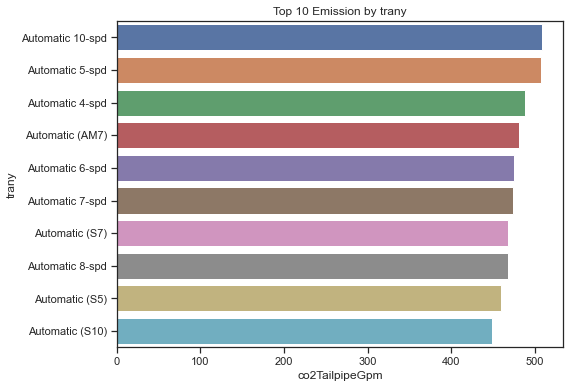

In [76]:
plt.figure(figsize=(8,6))
sns.barplot(y = Top_10_trany['trany'], x = Top_10_trany['co2TailpipeGpm'], orient = 'h')

plt.xlabel('co2TailpipeGpm')
plt.ylabel("trany")
plt.title("Top 10 Emission by trany")

In [97]:
Emission_by_trany = new_data_clean.groupby('trany')['co2TailpipeGpm'].mean().reset_index().sort_values(by= 'co2TailpipeGpm', ascending = False)
Least_10_trany = Emission_by_trany.tail(10)  
Least_10_trany

,trany,co2TailpipeGpm
14,Automatic (AV-S7),305.571447
13,Automatic (AV-S6),302.241884
3,Automatic (AM-S6),296.126470
23,Automatic (variable gear ratios),292.559970
12,Automatic (AV-S10),287.279070
11,Automatic (AV-S1),262.333333
2,Automatic (AM-S10),258.500000
7,Automatic (AM5),245.492063
0,Automatic (A1),4.267303
1,Automatic (A2),0.000000


Text(0.5, 1.0, 'Least 10 Emission by trany')

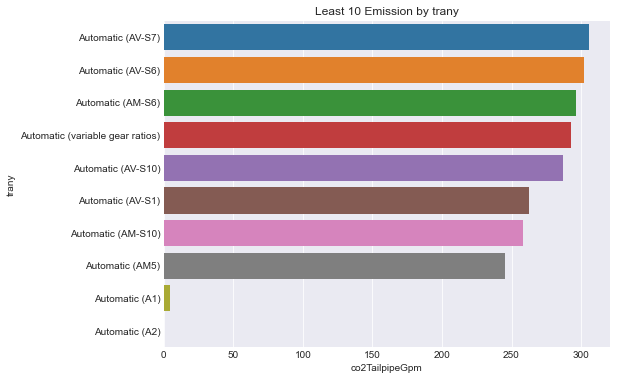

In [98]:
plt.figure(figsize=(8,6))
sns.barplot(y = Least_10_trany['trany'], x = Least_10_trany['co2TailpipeGpm'], orient = 'h')

plt.xlabel('co2TailpipeGpm')
plt.ylabel("trany")
plt.title("Least 10 Emission by trany")

**Separating Input and Target variables, then, Numerical and Categorical Variables from Input variables**

In [77]:
Y = subset_df["co2TailpipeGpm"]
X = subset_df.drop(columns='co2TailpipeGpm')

In [78]:
numerical_features = X._get_numeric_data().columns 
categorical_features = X.columns.difference(numerical_features)

In [79]:
numerical_features

Index(['cylinders', 'displ', 'year'], dtype='object')

In [80]:
# creating tables with numerical and categorical variables
num_features = X[numerical_features]
cat_features = X[categorical_features]

In [81]:
#printing the counts of all categorical input with respect to trany feature
cat_features['trany'].value_counts()

Automatic (S6)                      6640
Automatic (S8)                      5431
Manual 6-spd                        5237
Automatic 4-spd                     4077
Automatic 6-spd                     3322
Manual 5-spd                        3028
Automatic 5-spd                     2615
Automatic (variable gear ratios)    1942
Automatic 8-spd                     1697
Automatic (AM-S7)                   1394
Automatic 7-spd                     1322
Automatic 9-spd                     1291
Automatic (S5)                      1248
Automatic (S10)                      927
Automatic (S7)                       734
Automatic (AM7)                      613
Automatic (AV-S6)                    598
Automatic 10-spd                     574
Automatic (AV-S7)                    468
Automatic (AM-S8)                    402
Automatic (S9)                       401
Automatic (S4)                       384
Automatic (AM-S6)                    340
Manual 7-spd                         314
Automatic (AV-S8

**Feature Scaling**


In [82]:
from sklearn.preprocessing import StandardScaler

ss =StandardScaler()
    
for col in num_features.columns:
    num_features[col] = ss.fit_transform(num_features[[col]]).squeeze()

**Label Enconding the Categorical Features**

In [83]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_features = cat_features.astype(str).apply(LabelEncoder().fit_transform)

In [84]:
#printing the counts of all categorical input with respect to trany feature
cat_features['trany'].value_counts()

17    6640
19    5431
30    5237
23    4077
25    3322
29    3028
24    2615
21    1942
27    1697
2     1394
26    1322
28    1291
16    1248
14     927
18     734
7      613
11     598
22     574
12     468
3      402
20     401
15     384
1      340
31     314
13     296
6      285
10      86
8       70
9       48
5       28
4       12
0        4
Name: trany, dtype: int64

**Concatenating the Numerical and Categorical Variables**

In [85]:
X = pd.concat([num_features, cat_features], axis = 1)

# Model Development

## Random Forest Regression

In [86]:
# Split the data into training and test samples
from sklearn.model_selection import train_test_split

# Split the data into training and test samples, stratified by Trany
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=X['fuelType'], random_state=42)

In [138]:
from sklearn.ensemble import RandomForestRegressor
rf =  RandomForestRegressor(max_depth=10, max_features=6, min_samples_leaf=500,
                      min_samples_split=200, n_estimators=500)
rf = rf.fit(X_train, Y_train)

In [139]:
# Compute training R2
training_R2 = rf.score(X_train, Y_train)
training_R2

0.8190847892094919

Text(0.5, 1.0, 'Training R2 = 0.82  Test R2 = 0.82')

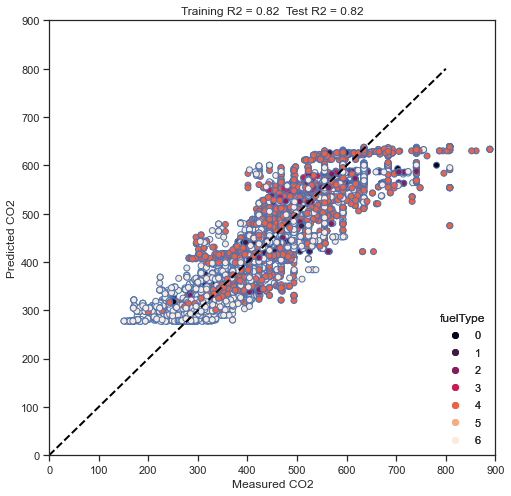

In [140]:
# Making prediction using test data
Y_pred = rf.predict(X_test) 

# Compute test R2
test_R2 = rf.score(X_test, Y_test)   

# Calculating MSE 
from sklearn.metrics import mean_squared_error 
error = mean_squared_error(Y_test, Y_pred) 
residual = (Y_test - Y_pred)  
   
# Create a series of plots for predicted CO2 versus actual CO2 
fig = plt.figure(figsize=(8, 8))
plt.axis([0, 900, 0, 900])
scatter = plt.scatter(Y_test, Y_pred, c=X_test['fuelType'], edgecolor = 'b')# colored the dataset distribution by the fuel type

# Add a legend
legend1 = plt.legend(*scatter.legend_elements(),
                    loc="lower right", title="fuelType")
plt.gca().add_artist(legend1)

plt.plot([0, 800],[0, 800], color='black', linewidth=2, linestyle='--')


plt.ylabel('Predicted CO2') 
plt.xlabel('Measured CO2') 
plt.title('Training R2 = %.2f  Test R2 = %.2f'%(training_R2, test_R2))

In [127]:
test_R2

0.8191983789145586

I colored the algorithm plots by the most important categorical variable,  'trany' to see possible patterns and relationships between the different trany. I'll be doing same for all the other algorithms.

### Using Cross-Validation for Tuning the Hyperparameter K.

In [67]:
from sklearn.model_selection import GridSearchCV

#params = {'n_estimators': [200, 500], 'max_depth': [5, 10]}
params = {'n_estimators': [200, 500], 'max_depth': [5, 10], 'min_samples_split': [200, 1000], 'min_samples_leaf': [500, 1000], 'max_features': [3, 6]}

rf = RandomForestRegressor()

grid_search = GridSearchCV(rf, params, cv=10, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10], 'max_features': [3, 6],
                         'min_samples_leaf': [500, 1000],
                         'min_samples_split': [200, 1000],
                         'n_estimators': [200, 500]},
             scoring='neg_root_mean_squared_error')

In [68]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

In [69]:
cv_res[['params','split0_test_score','split1_test_score','split2_test_score', 'mean_test_score', 'std_test_score', 
        'rank_test_score']]

,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
25,"{'max_depth': 10, 'max_features': 6, 'min_samp...",-52.986320,-55.044165,-56.163175,-54.477408,1.157976,1
26,"{'max_depth': 10, 'max_features': 6, 'min_samp...",-53.149624,-55.269826,-56.187338,-54.514943,1.130057,2
27,"{'max_depth': 10, 'max_features': 6, 'min_samp...",-53.085806,-54.916024,-56.278879,-54.515056,1.179539,3
24,"{'max_depth': 10, 'max_features': 6, 'min_samp...",-53.217709,-55.127382,-56.374850,-54.530128,1.108718,4
16,"{'max_depth': 10, 'max_features': 3, 'min_samp...",-54.182158,-56.120545,-57.469704,-55.861385,1.262314,5
19,"{'max_depth': 10, 'max_features': 3, 'min_samp...",-54.076592,-56.690942,-56.946884,-55.864637,1.233831,6
17,"{'max_depth': 10, 'max_features': 3, 'min_samp...",-53.997994,-56.467145,-57.192619,-55.879675,1.239572,7
18,"{'max_depth': 10, 'max_features': 3, 'min_samp...",-54.025342,-56.299642,-57.085005,-55.895715,1.192917,8
8,"{'max_depth': 5, 'max_features': 6, 'min_sampl...",-55.219184,-56.720045,-58.360086,-56.567290,1.155087,9
9,"{'max_depth': 5, 'max_features': 6, 'min_sampl...",-55.307257,-56.789636,-58.339740,-56.588154,1.171224,10


In [70]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=10, max_features=6, min_samples_leaf=500,
                      min_samples_split=200, n_estimators=500)

In [128]:
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(max_depth=10, max_features=6, min_samples_leaf=500,
                      min_samples_split=200, n_estimators=200)

rmse = -cross_val_score(rf, X_train, Y_train, scoring="neg_root_mean_squared_error", cv=10)

Text(0.5, 1.0, 'RMSE Values obtained over 10-Fold Cross-validation \n using RF Regression with an optimal set of parameters')

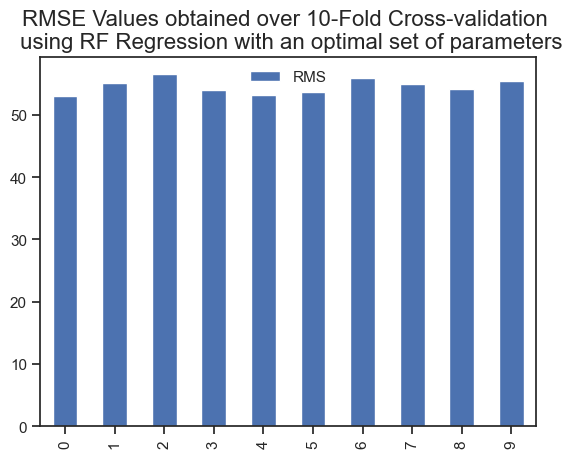

In [72]:
new_data_rf_rmses = pd.DataFrame(rmse, columns = ['RMS'])
new_data_rf_rmses.plot(kind = 'bar')
plt.title('RMSE Values obtained over 10-Fold Cross-validation \n using RF Regression with an optimal set of parameters', fontsize = 16)

### Apply Best Hyperparameter to the Test Data

In [141]:
rf = RandomForestRegressor(max_depth=10, max_features=6, min_samples_leaf=500,
                      min_samples_split=200, n_estimators=200)

rf.fit(X_train, Y_train) 

# Compute training R2
training_R2 = rf.score(X_train, Y_train) 

In [142]:
# Make prediction using test data
Y_pred = rf.predict(X_test)  

# Compute test R2
test_R2 = rf.score(X_test, Y_test)   
test_R2

0.8184799304781224

Text(0.5, 1.0, 'Training R2 = 0.82  Test R2 = 0.82')

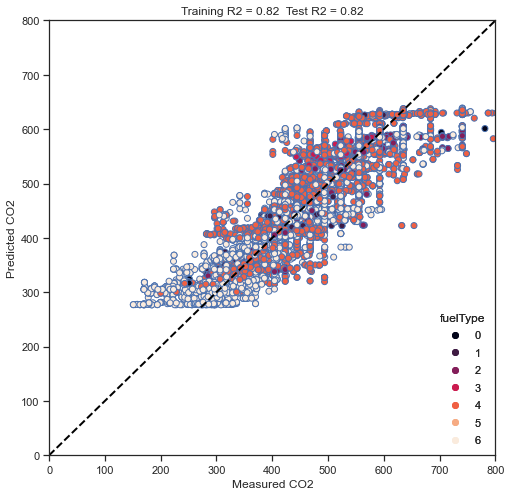

In [143]:
# Calculating MSE 
from sklearn.metrics import mean_squared_error 
error = mean_squared_error(Y_test, Y_pred) 
residual = (Y_test - Y_pred)  
   
# Create a series of plots for predicted CO2 versus actual CO2 
fig = plt.figure(figsize=(8, 8))
plt.axis([0, 800, 0, 800])
scatter = plt.scatter(Y_test, Y_pred, c=X_test['fuelType'], edgecolor = 'b')# colored the dataset distribution by the fuel type

# Add a legend
legend1 = plt.legend(*scatter.legend_elements(),
                    loc="lower right", title="fuelType")
plt.gca().add_artist(legend1)

plt.plot([0, 800],[0, 800], color='black', linewidth=2, linestyle='--')


plt.ylabel('Predicted CO2') 
plt.xlabel('Measured CO2') 
plt.title('Training R2 = %.2f  Test R2 = %.2f'%(training_R2, test_R2))

**Feature Importance**

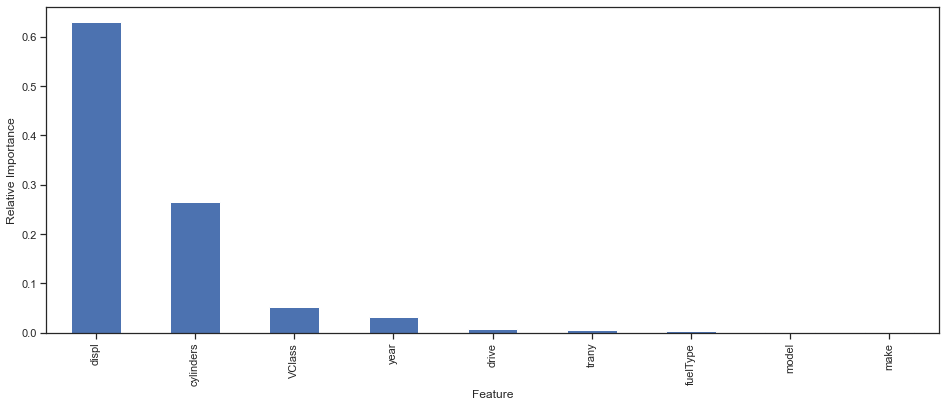

In [94]:
feature_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

ax = feature_imp.plot(kind='bar', figsize=(16, 6))
ax.set(ylabel='Relative Importance');
ax.set(xlabel='Feature');

In [77]:
feature_imp

displ        0.557621
cylinders    0.190775
trany        0.190024
VClass       0.030671
fuelType     0.023563
drive        0.004534
model        0.001919
make         0.000893
dtype: float64

## KNN Regression

In [144]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 

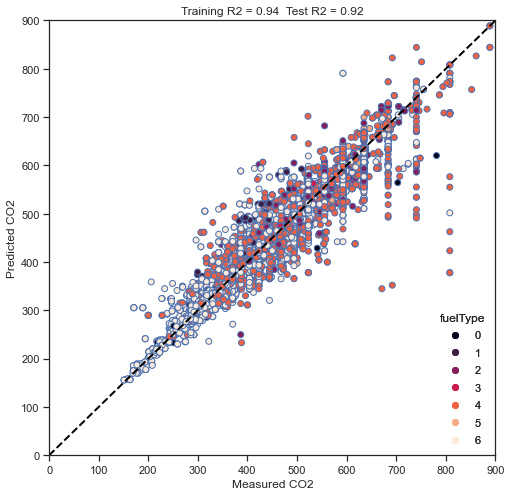

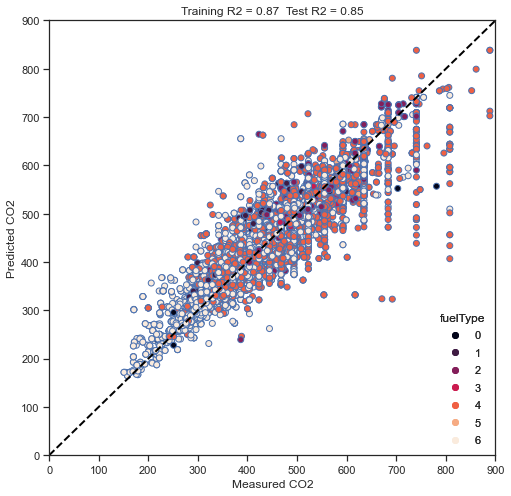

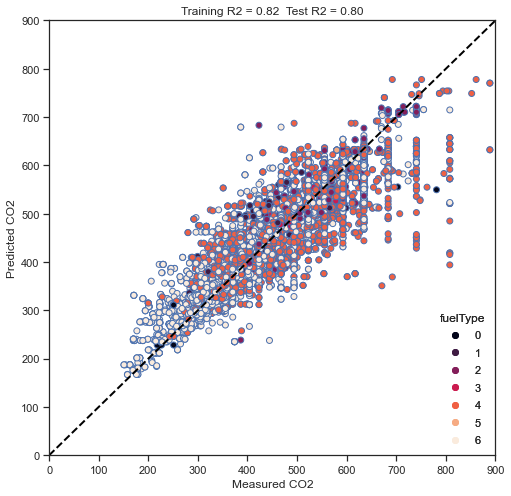

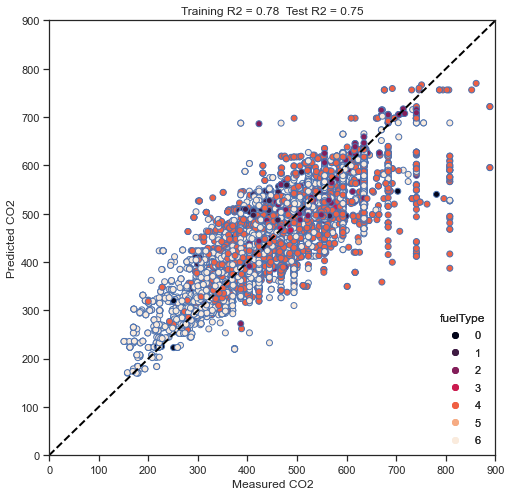

In [145]:
# To store MSE values for different k
MSE = [] 

# To store values of K
k   = []   

 # To store R2
R2  = []     

for K in range(10, 41, 10):
    k.append(K)
    knn = neighbors.KNeighborsRegressor(n_neighbors = K)

    # Fit the model to the training dataset
    knn.fit(X_train, Y_train)  
    
    # Compute training R2
    training_R2 = knn.score(X_train, Y_train) 
    
    # Make prediction using test data
    Y_pred = knn.predict(X_test)  
    
    # Compute test R2
    test_R2 = knn.score(X_test, Y_test)       
    R2.append(test_R2)
    
    # Calculate MSE
    error = mean_squared_error(Y_test, Y_pred)
    
    # Store MSE values for different K
    MSE.append(error)                          
    residual = (Y_test - Y_pred)  
   
    ## Also create a series of plots for predicted CO2 versus actual CO2 
    fig = plt.figure(figsize=(8, 8))
    plt.axis([0, 900, 0, 900])
    scatter = plt.scatter(Y_test, Y_pred, c=X_test['fuelType'], edgecolor = 'b')
    
    # Add a legend
    legend1 = plt.legend(*scatter.legend_elements(),
                    loc="lower right", title="fuelType")
    plt.gca().add_artist(legend1)
    
    plt.plot([0, 900],[0, 900], color='black', linewidth=2, linestyle='--')


    plt.ylabel('Predicted CO2') 
    plt.xlabel('Measured CO2') 
    plt.title('Training R2 = %.2f  Test R2 = %.2f'%(training_R2, test_R2))

In [97]:
test_R2

0.7542416544603714

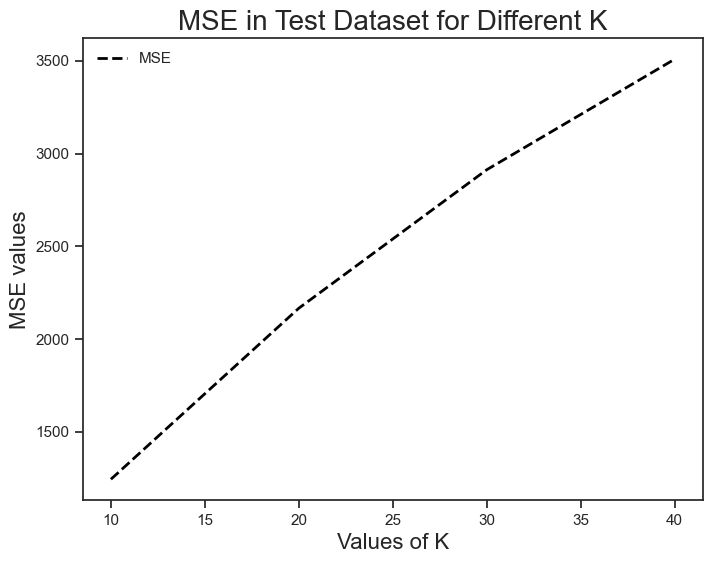

In [80]:
#plotting the mse values against k values
fig = plt.figure(K, figsize=(8, 6))
plt.plot(k, MSE, label = 'MSE', color='black', linewidth=2, linestyle='--')
plt.xlabel ('Values of K', fontsize = 16)
plt.ylabel ('MSE values', fontsize = 16)
plt.title ('MSE in Test Dataset for Different K', fontsize = 20)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.legend()

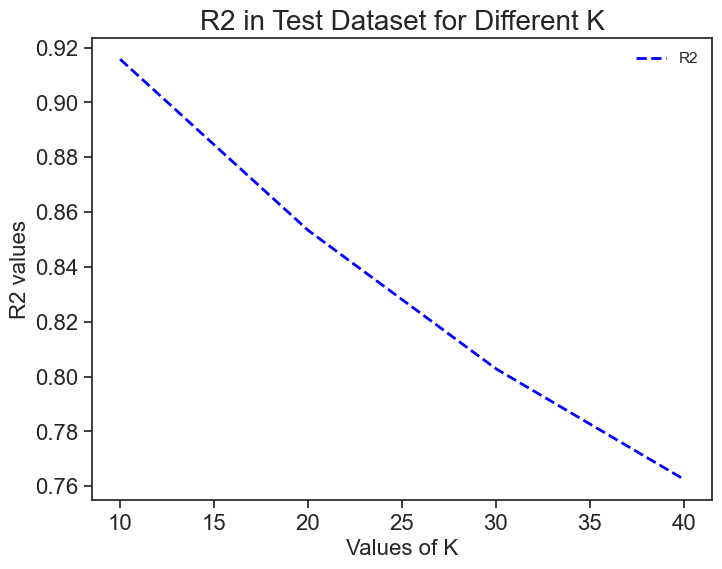

In [81]:
#plotting the r2 values against k values
fig = plt.figure(K, figsize=(8, 6))
plt.plot(k, R2, label = 'R2', color='blue', linewidth=2, linestyle='--')
plt.xlabel ('Values of K', fontsize = 16)
plt.ylabel ('R2 values', fontsize = 16)
plt.title ('R2 in Test Dataset for Different K', fontsize = 20)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.legend()

### Using Cross-Validation for Tuning the Hyperparameter K.

In [82]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': range(10, 41, 10)}

knn = neighbors.KNeighborsRegressor()
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(10, 41, 10)},
             scoring='neg_root_mean_squared_error')

In [83]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

In [84]:
cv_res[['params','split0_test_score','split1_test_score','split2_test_score', 'mean_test_score', 'std_test_score', 
        'rank_test_score']]

,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,{'n_neighbors': 10},-34.960950,-35.840700,-38.444085,-36.450775,1.173727,1
1,{'n_neighbors': 20},-47.498947,-49.365763,-51.187724,-48.666383,1.275636,2
2,{'n_neighbors': 30},-55.170292,-58.207888,-58.945671,-56.618256,1.491555,3
3,{'n_neighbors': 40},-60.258931,-63.747595,-64.134090,-61.980694,1.665924,4


In [85]:
grid_search.best_estimator_

KNeighborsRegressor(n_neighbors=10)

In [146]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=10)

#rmse = -cross_val_score(knn, X_train, Y_train, scoring="neg_root_mean_squared_error", cv=10)#

Text(0.5, 1.0, 'RMSE Values obtained over 10-Fold Cross-validation \n using KNN Regression with an optimal set of parameters')

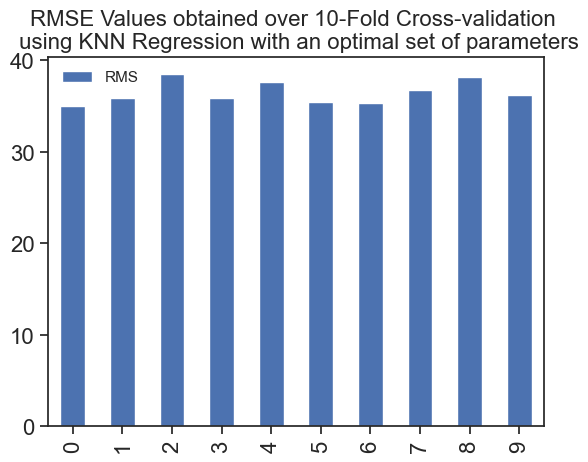

In [87]:
new_data_rf_rmses = pd.DataFrame(rmse, columns = ['RMS'])
new_data_rf_rmses.plot(kind = 'bar')
plt.title('RMSE Values obtained over 10-Fold Cross-validation \n using KNN Regression with an optimal set of parameters', fontsize = 16)


### Apply Best Hyperparameter to the Test Data

In [147]:
knn = KNeighborsRegressor(n_neighbors=10)

knn.fit(X_train, Y_train) 

# Compute training R2
training_R2 = knn.score(X_train, Y_train) 
training_R2

0.9408076693180738

In [148]:
# Make prediction using test data
Y_pred = knn.predict(X_test)  

# Compute test R2
test_R2 = knn.score(X_test, Y_test) 
test_R2

0.9177057757378915

Text(0.5, 1.0, 'Training R2 = 0.94  Test R2 = 0.92')

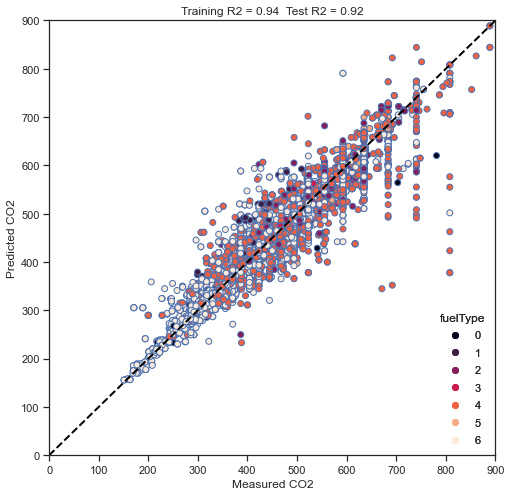

In [149]:
# Create a series of plots for predicted CO2 versus actual CO2 

fig = plt.figure(figsize=(8, 8))
plt.axis([0, 900, 0, 900])
scatter = plt.scatter(Y_test, Y_pred, c=X_test['fuelType'], edgecolor = 'b')

# Add a legend
legend1 = plt.legend(*scatter.legend_elements(),
                    loc="lower right", title="fuelType")
plt.gca().add_artist(legend1)

plt.plot([0, 900],[0, 900], color='black', linewidth=2, linestyle='--')


plt.ylabel('Predicted CO2') 
plt.xlabel('Measured CO2') 
plt.title('Training R2 = %.2f  Test R2 = %.2f'%(training_R2, test_R2))

## Decision Tree Regression

In [104]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error 

dt = DecisionTreeRegressor(max_depth=15, min_samples_leaf=200, min_samples_split=200)

# Fit the model to the training dataset
dt.fit(X_train, Y_train)  

# Compute training R2
training_R2 = dt.score(X_train, Y_train) 

In [105]:
# Make prediction using test data
Y_pred = dt.predict(X_test)  

# Compute test R2
test_R2 = dt.score(X_test, Y_test)       

# Calculate MSE
error = mean_squared_error(Y_test, Y_pred) 
residual = (Y_test - Y_pred)  
   

In [106]:
test_R2

0.849242442272461

Text(0.5, 1.0, 'Training R2 = 0.85  Test R2 = 0.85')

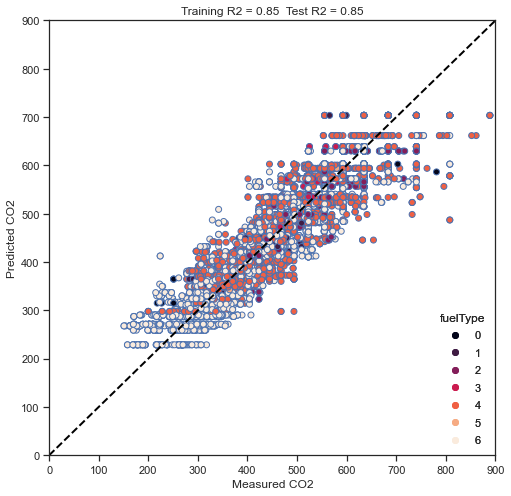

In [108]:
# Create a series of plots for predicted versus actual CO2 
fig = plt.figure(figsize=(8, 8))
plt.axis([0, 900, 0, 900])
scatter = plt.scatter(Y_test, Y_pred, c=X_test['fuelType'], edgecolor = 'b')

# Add a legend
legend1 = plt.legend(*scatter.legend_elements(),
                    loc="lower right", title="fuelType")
plt.gca().add_artist(legend1)

plt.plot([0, 900],[0, 900], color='black', linewidth=2, linestyle='--')


plt.ylabel('Predicted CO2') 
plt.xlabel('Measured CO2') 
plt.title('Training R2 = %.2f  Test R2 = %.2f'%(training_R2, test_R2))

### Using Cross-Validation for Tuning the Hyperparameter K.

In [94]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth': [10, 15], 'min_samples_split': [200, 1000], 'min_samples_leaf': [200, 500]}

dt = DecisionTreeRegressor()

grid_search = GridSearchCV(dt, params, cv=10, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [10, 15], 'min_samples_leaf': [200, 500],
                         'min_samples_split': [200, 1000]},
             scoring='neg_root_mean_squared_error')

In [95]:
cv_reg = pd.DataFrame(grid_search.cv_results_)
cv_reg.sort_values(by="mean_test_score", ascending=False, inplace=True)

In [96]:
cv_reg[['params','split0_test_score','split1_test_score','split2_test_score', 'mean_test_score', 'std_test_score', 
        'rank_test_score']]

,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
4,"{'max_depth': 15, 'min_samples_leaf': 200, 'mi...",-45.307206,-45.956616,-46.435638,-45.192694,0.796428,1
0,"{'max_depth': 10, 'min_samples_leaf': 200, 'mi...",-45.557409,-46.279764,-46.591426,-45.417149,0.818766,2
1,"{'max_depth': 10, 'min_samples_leaf': 200, 'mi...",-48.009868,-48.967322,-49.724290,-48.342680,0.962216,3
5,"{'max_depth': 15, 'min_samples_leaf': 200, 'mi...",-48.009868,-48.967322,-49.724290,-48.342680,0.962216,3
7,"{'max_depth': 15, 'min_samples_leaf': 500, 'mi...",-50.859552,-51.046037,-51.665971,-50.617649,0.782431,5
2,"{'max_depth': 10, 'min_samples_leaf': 500, 'mi...",-50.859552,-51.046037,-51.665971,-50.617649,0.782431,6
3,"{'max_depth': 10, 'min_samples_leaf': 500, 'mi...",-50.859552,-51.046037,-51.665971,-50.617649,0.782431,6
6,"{'max_depth': 15, 'min_samples_leaf': 500, 'mi...",-50.859552,-51.046037,-51.665971,-50.617649,0.782431,6


In [97]:
grid_search.best_estimator_

DecisionTreeRegressor(max_depth=15, min_samples_leaf=200, min_samples_split=200)

In [98]:
from sklearn.model_selection import cross_val_score

dt = DecisionTreeRegressor(max_depth=15, min_samples_leaf=200, min_samples_split=200)
rmse = -cross_val_score(dt, X_train, Y_train, scoring="neg_root_mean_squared_error", cv=10)

Text(0.5, 1.0, 'RMSE Values obtained over 10-Fold Cross-validation \n using DT Regression with an optimal set of parameters')

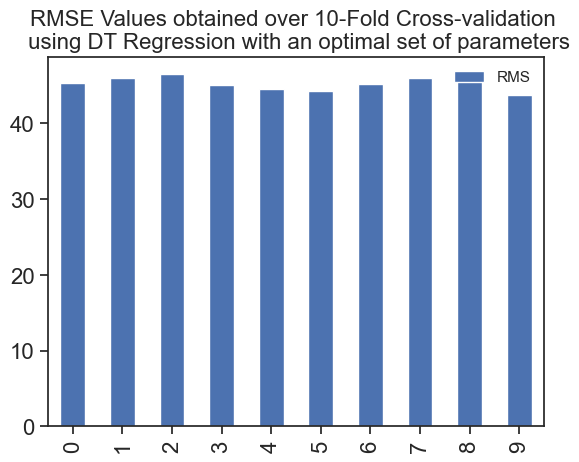

In [99]:
df_dt_rmses = pd.DataFrame(rmse, columns = ['RMS'])
df_dt_rmses.plot(kind = 'bar')
plt.title('RMSE Values obtained over 10-Fold Cross-validation \n using DT Regression with an optimal set of parameters', fontsize = 16)

### Apply Best Hyperparameter to the Test Data

In [109]:
dt = DecisionTreeRegressor(max_depth=15, min_samples_leaf=200, min_samples_split=200)

dt.fit(X_train, Y_train) 

# Compute training R2
training_R2 = dt.score(X_train, Y_train) 
training_R2

0.851488103874245

In [110]:
# Make prediction using test data
Y_pred = dt.predict(X_test)  

# Compute test R2
test_R2 = dt.score(X_test, Y_test) 
test_R2

0.849242442272461

Text(0.5, 1.0, 'Training R2 = 0.85  Test R2 = 0.85')

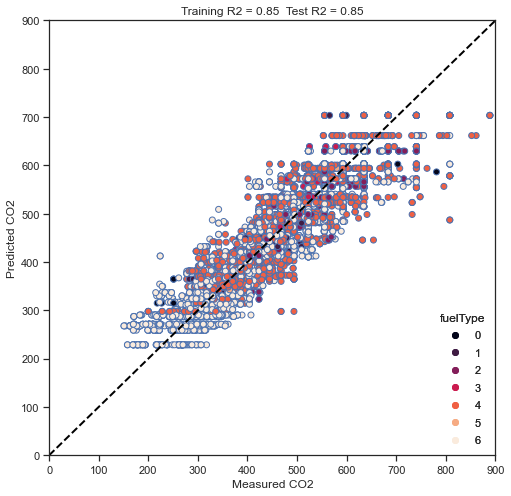

In [111]:
# Create a series of plots for predicted versus actual CO2 
fig = plt.figure(figsize=(8, 8))
plt.axis([0, 900, 0, 900])
scatter = plt.scatter(Y_test, Y_pred, c=X_test['fuelType'], edgecolor = 'b')

# Add a legend
legend1 = plt.legend(*scatter.legend_elements(),
                    loc="lower right", title="fuelType")
plt.gca().add_artist(legend1)

plt.plot([0, 900],[0, 900], color='black', linewidth=2, linestyle='--')


plt.ylabel('Predicted CO2') 
plt.xlabel('Measured CO2') 
plt.title('Training R2 = %.2f  Test R2 = %.2f'%(training_R2, test_R2))

## ANN Model

In [112]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Create an MLPRegressor object and set the hyperparameters
ann = MLPRegressor(hidden_layer_sizes=(10,), activation='relu', solver='adam', alpha=0.0001, 
                   learning_rate='constant', learning_rate_init=0.001, max_iter=200, random_state=32)

In [113]:
# Fit the model to the training dataset
ann.fit(X_train, Y_train)  

# Compute training R2
training_R2 = ann.score(X_train, Y_train) 

In [114]:
training_R2

0.7769825112312561

In [115]:
# Make prediction using test data
Y_pred = ann.predict(X_test)  

# Compute test R2
test_R2 = ann.score(X_test, Y_test)       

# Calculate MSE
error = mean_squared_error(Y_test, Y_pred) 
residual = (Y_test - Y_pred)  
   

In [116]:
test_R2

0.7740541880116271

Text(0.5, 1.0, 'Training R2 = 0.78  Test R2 = 0.77')

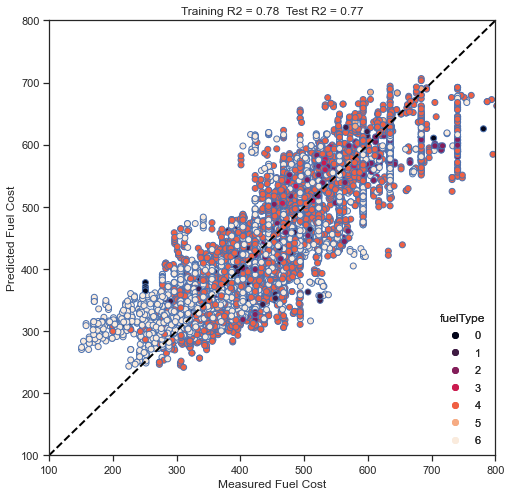

In [117]:
# Create a series of plots for predicted versus actual fuel cost for different values of K
# Also create a series of plots for predicted versus actual DT for different values of K
fig = plt.figure(figsize=(8, 8))
plt.axis([100, 800, 100, 800])
scatter = plt.scatter(Y_test, Y_pred, c=X_test['fuelType'], edgecolor = 'b')

# Add a legend
legend1 = plt.legend(*scatter.legend_elements(),
                    loc="lower right", title="fuelType")
plt.gca().add_artist(legend1)

plt.plot([100, 800],[100, 800], color='black', linewidth=2, linestyle='--')


plt.ylabel('Predicted Fuel Cost') 
plt.xlabel('Measured Fuel Cost') 
plt.title('Training R2 = %.2f  Test R2 = %.2f'%(training_R2, test_R2))

### Using Cross-Validation for Tuning the Hyperparameter K.

In [108]:
from sklearn.model_selection import GridSearchCV

# Create an MLPRegressor object
ann = MLPRegressor(random_state=32)

# Set up the hyperparameter grid
param_grid = {
    'hidden_layer_sizes': [(10,10), (50,50), (100,100), (150,150)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.0001],
    'learning_rate': ['constant'],
    'learning_rate_init': [0.001],
    'max_iter': [50]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(ann, param_grid, cv=5)

# Fit the GridSearchCV object to the training dataset
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=MLPRegressor(random_state=32),
             param_grid={'activation': ['relu'], 'alpha': [0.0001],
                         'hidden_layer_sizes': [(10, 10), (50, 50), (100, 100),
                                                (150, 150)],
                         'learning_rate': ['constant'],
                         'learning_rate_init': [0.001], 'max_iter': [50],
                         'solver': ['adam']})

In [109]:
cv_reg = pd.DataFrame(grid_search.cv_results_)
cv_reg.sort_values(by="mean_test_score", ascending=False, inplace=True)

In [110]:
cv_reg[['params','split0_test_score','split1_test_score','split2_test_score', 'mean_test_score', 'std_test_score', 
        'rank_test_score']]

,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
3,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",0.680564,0.682378,0.627061,0.699181,0.048323,1
1,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",0.622977,0.734855,0.617424,0.668021,0.043590,2
2,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",0.657838,0.677766,0.630295,0.650295,0.019322,3
0,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",0.596160,0.593667,0.575568,0.596187,0.014196,4


In [111]:
grid_search.best_estimator_

MLPRegressor(hidden_layer_sizes=(150, 150), max_iter=50, random_state=32)

Text(0.5, 1.0, 'RMSE Values obtained over 10-Fold Cross-validation \n using ANN Regression with an optimal set of parameters')

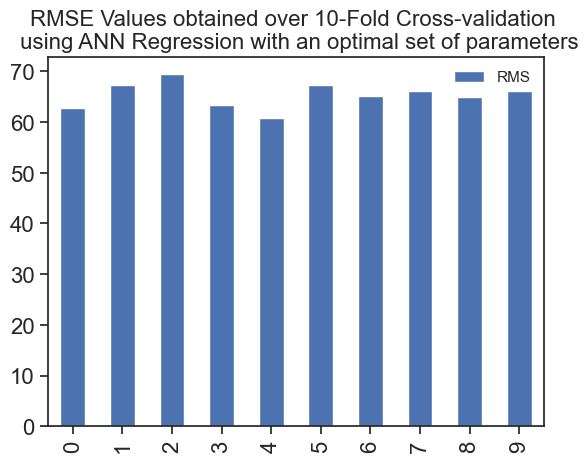

In [112]:
from sklearn.model_selection import cross_val_score

# Create an MLPRegressor object and set the hyperparameters
ann = MLPRegressor(hidden_layer_sizes=(150, 150), max_iter=50, random_state=32)

# Compute cross-validation scores
rmse = -cross_val_score(ann, X_train, Y_train, scoring="neg_root_mean_squared_error", cv=10)

new_data_ann_scores = pd.DataFrame(rmse, columns = ['RMS'])
new_data_ann_scores.plot(kind = 'bar')
plt.title('RMSE Values obtained over 10-Fold Cross-validation \n using ANN Regression with an optimal set of parameters', fontsize = 16)

### Apply Best Hyperparameter to the Test Data

In [118]:
ann = MLPRegressor(hidden_layer_sizes=(150, 150), max_iter=50, random_state=32)

ann.fit(X_train, Y_train) 

# Compute training R2
training_R2 = ann.score(X_train, Y_train) 

In [119]:
# Make prediction using test data
Y_pred = ann.predict(X_test)  

# Compute test R2
test_R2 = ann.score(X_test, Y_test)    
test_R2

0.7731167453084773

Text(0.5, 1.0, 'Training R2 = 0.77  Test R2 = 0.77')

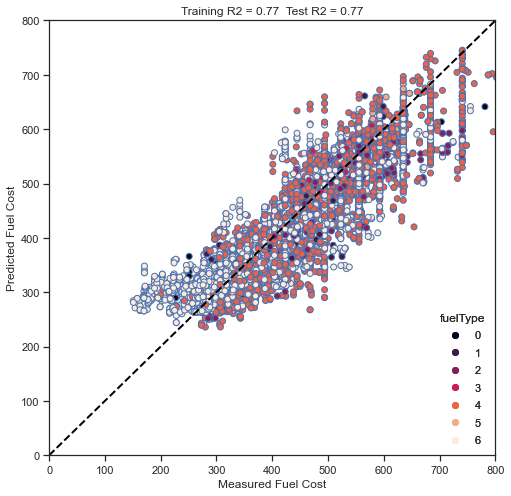

In [120]:
# Create a series of plots for predicted versus actual fuel cost
fig = plt.figure(figsize=(8, 8))
plt.axis([0, 800, 0, 800])
plt.scatter(Y_test, Y_pred, c=X_test['fuelType'], edgecolor = 'b')

# Add a legend
legend1 = plt.legend(*scatter.legend_elements(),
                    loc="lower right", title="fuelType")
plt.gca().add_artist(legend1)

plt.plot([0, 800],[0, 800], color='black', linewidth=2, linestyle='--')
plt.ylabel('Predicted Fuel Cost') 
plt.xlabel('Measured Fuel Cost') 
plt.title('Training R2 = %.2f  Test R2 = %.2f'%(training_R2, test_R2))

#### Comments

The RMSE Values obtained over 10-Fold Cross-validation using KNN and ANN with an optimal set of parameters became better after stratification.

The R2 value for ANN performed significantly better after stratification, others had no significant changes.

In [1]:
pip install sklearn-extensions

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for sklearn-extensions: filename=sklearn_extensions-0.0.2-py2.py3-none-any.whl size=24577 sha256=1267a5614d53212d10f80fb9b51dd4530861e78a60611136305cdd6164a2b9b6
  Stored in directory: c:\users\clinton\appdata\local\pip\cache\wheels\4a\cb\ac\53bf741145e8e37ea78f21c35f483132d6aa519d2d023fb6d5
Successfully built sklearn-extensions



In [121]:
from sklearn.ensemble import ExtraTreesRegressor
et = ExtraTreesRegressor(random_state=42)
et.fit(X_train, Y_train)

ExtraTreesRegressor(random_state=42)

In [122]:
# Make prediction using test data
Y_pred = et.predict(X_test)  

# Compute test R2
et_R2 = et.score(X_test, Y_test)
et_R2


0.9925093921258562

In [131]:
et_train = et.score(X_train, Y_train)

In [132]:
et_train

0.9988780966703017

Text(0.5, 1.0, 'Training R2 = 1.00  Test R2 = 0.99')

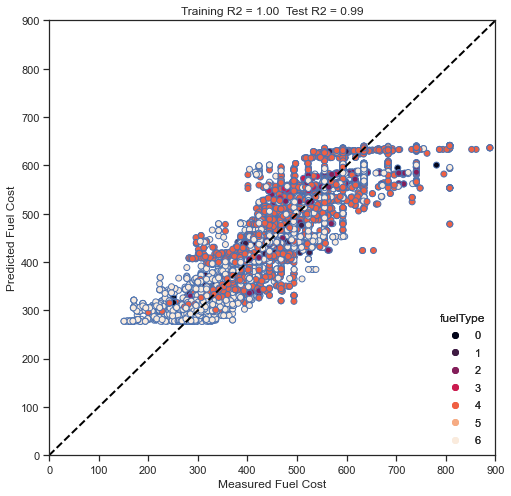

In [133]:
fig = plt.figure(figsize=(8, 8))
plt.axis([0, 900, 0, 900])
scatter = plt.scatter(Y_test, Y_pred, c=X_test['fuelType'], edgecolor = 'b')

# Add a legend
legend1 = plt.legend(*scatter.legend_elements(),
                    loc="lower right", title="fuelType")
plt.gca().add_artist(legend1)

plt.plot([0, 900],[0, 900], color='black', linewidth=2, linestyle='--')
plt.ylabel('Predicted Fuel Cost') 
plt.xlabel('Measured Fuel Cost') 
plt.title('Training R2 = %.2f  Test R2 = %.2f'%(et_train, et_R2))

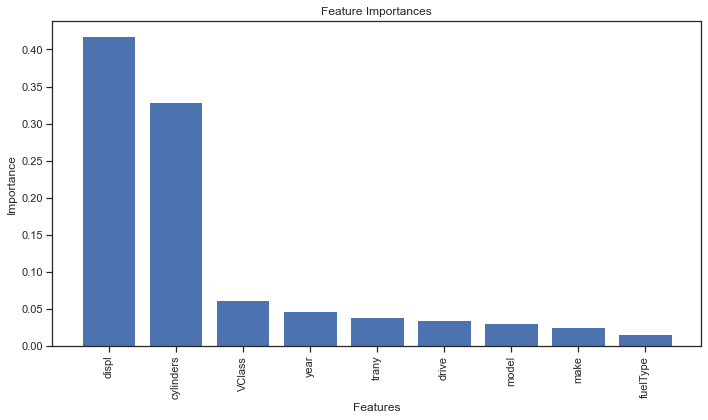

In [137]:
# Get feature importances
importances = et.feature_importances_

sorted_indices = importances.argsort()[::-1]
sorted_features = X.columns[sorted_indices]
sorted_importances = importances[sorted_indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances)
plt.xticks(range(len(sorted_importances)), sorted_features, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()